# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerias necesarias

`pip install --upgrade pip`

`pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info`


## Importar librerias

In [1]:
# Importando librerias necesarias
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# Diccionario de colores de pinguinos
penguin_colors = {
    'Adelie': '#ff6602',
    'Gentoo': '#0f7175',
    'Chinstrap': '#c65dc9'
}

# Cargando los datos

## Utilizando el paquete `palmerpenguins`

*Datos crudos*

In [3]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

*Datos previamente procesados*

In [4]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

# Utilizando los conjuntos de datos de `seaborn`

In [5]:
preprocessed_penguins_df = sns.load_dataset('penguins')
preprocessed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

# Utilizando la interfaz

In [6]:
raw_penguins_df2 = pd.read_csv('../data/penguins_raw.csv')
raw_penguins_df2

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

In [7]:
preprocessed_penguins_df2 = pd.read_csv('../data/penguins.csv')
preprocessed_penguins_df2

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [8]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [9]:
(
    preprocessed_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [10]:
preprocessed_penguins_df.shape
# 334 observaciones --> Filas
# 8 variables --> Columnas

(344, 7)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [11]:
(
    preprocessed_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [12]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [13]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

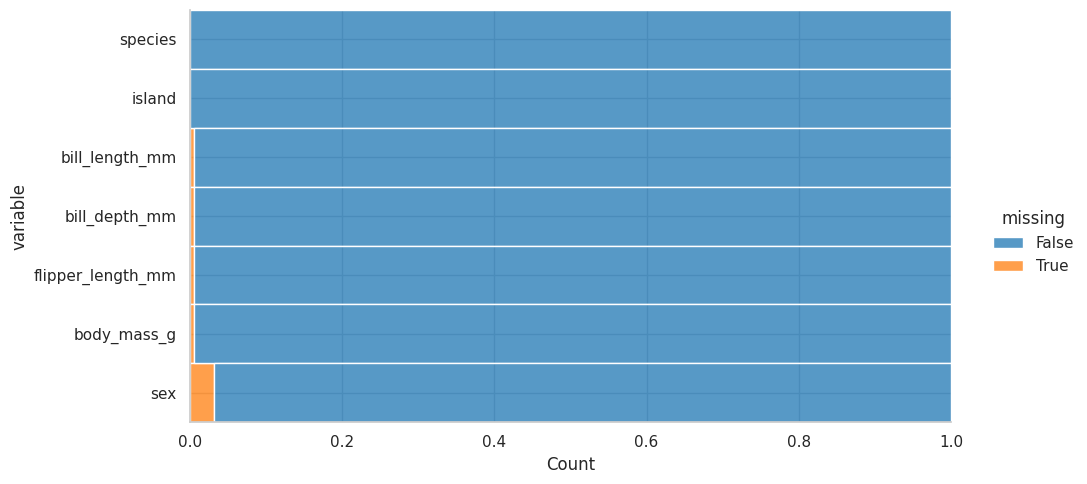

In [14]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name="missing")
    .pipe(
        lambda df: (
            sns.displot(
                data=df, y="variable", hue="missing", multiple="fill", aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

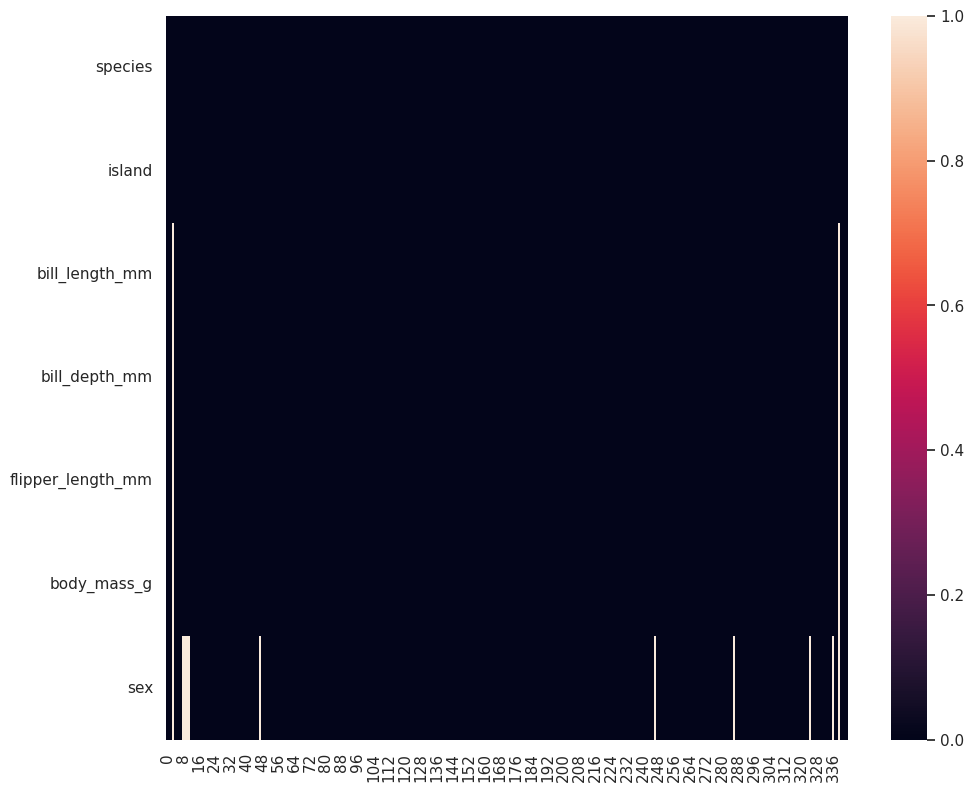

In [15]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
)

En este caso podemos eliminar los valores nulos, ya que no representan para este práctico una gran cantidad de datos por lo que puede no afectarnos, en otro tipo de análisis será importante evaluar si eliminar o no eliminar, ya que puede afectarnos.

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [16]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

**Todas las variables**

In [17]:
# Describe todo conjunto de datos
processed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    333.000000   333  
unique          NaN     2  
top             NaN  Male  
freq            NaN   168  
mean    4207.057057   NaN  
std      805.215802   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4775.000000   NaN  
max     6300.000000   NaN

## Solo las numéricas

In [18]:
# Solo variable numericas
processed_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

## Solo categóricas - 1

In [19]:
processed_penguins_df.describe(include=object) # type: ignore

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

## Solo categóricas - 2

In [20]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    }).describe(include='category') # type: ignore
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

## ¿Cómo visualizar los conteos?

### Pandas

<Axes: xlabel='species'>

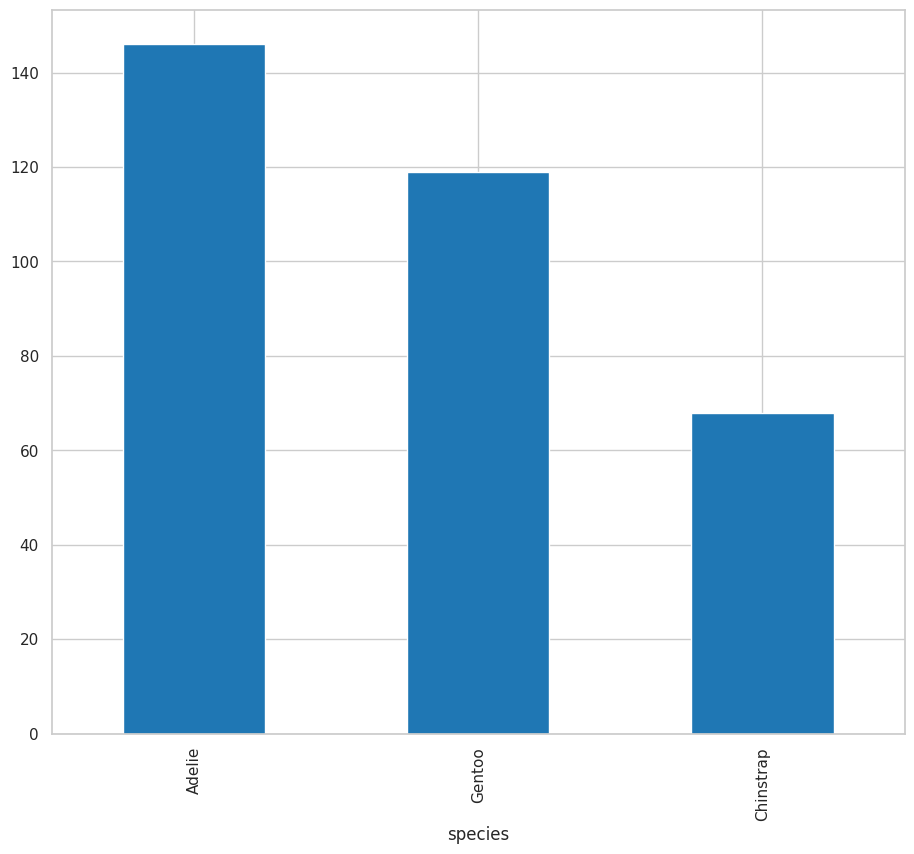

In [21]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(kind='bar')
)

### Seaborn

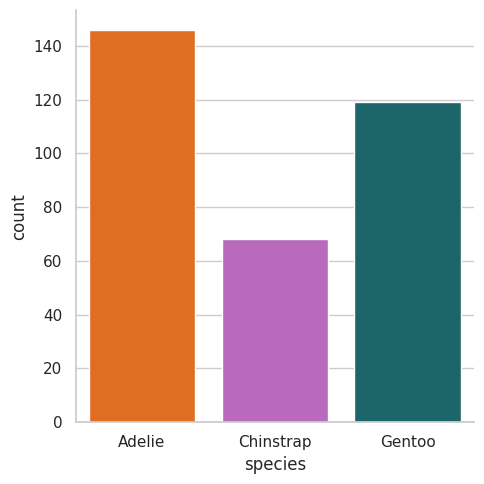

In [22]:
sns.catplot(data=processed_penguins_df, x='species', hue='species', kind='count', palette=penguin_colors); # type: ignore

<Axes: xlabel='species', ylabel='count'>

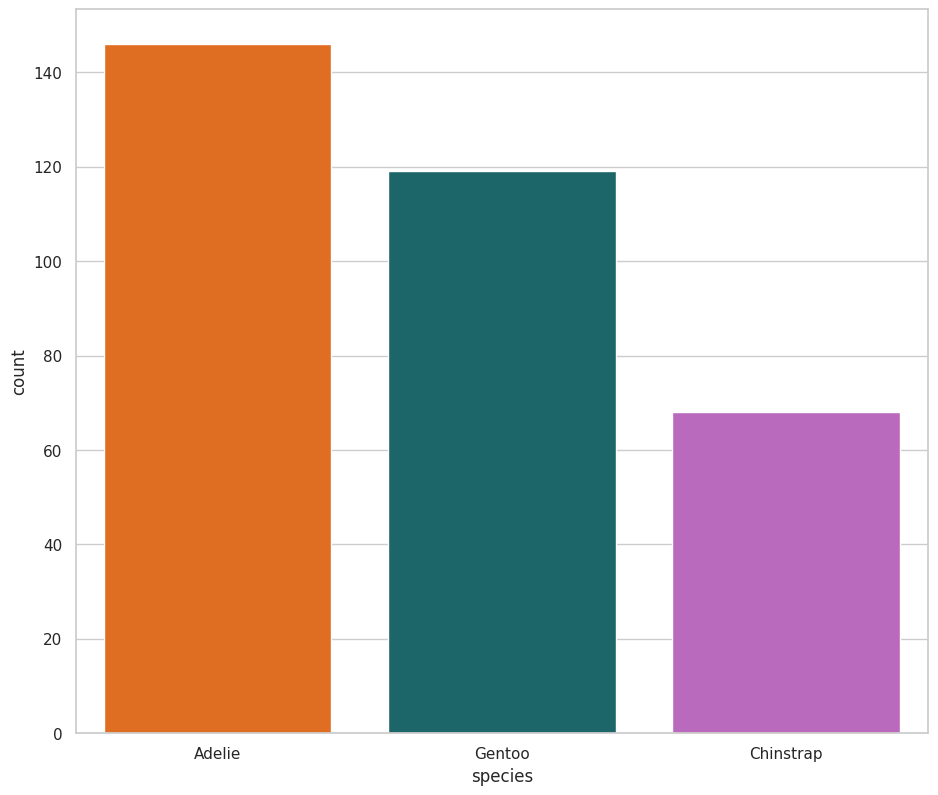

In [23]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                hue='species',
                palette=penguin_colors # type: ignore
            )
        )
    )
)

## ¿Cómo visualizar las proporciones?

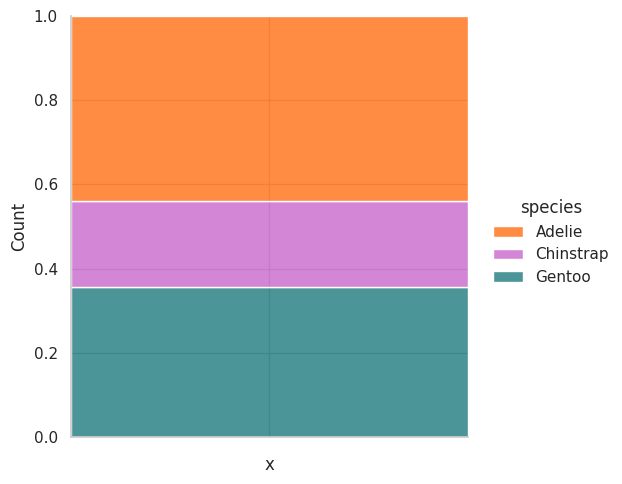

In [24]:
(
    processed_penguins_df
    .assign(**{'x': ''}) # type: ignore
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_colors
            )
        )
    )
)

## Proporciones Islas y Especies

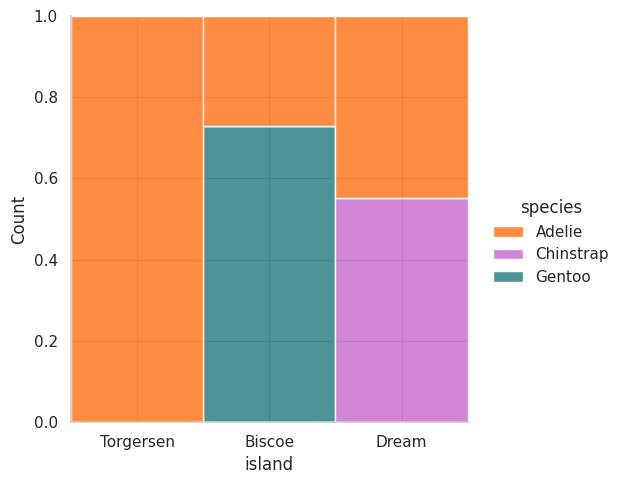

In [25]:
(
    processed_penguins_df
    .assign(**{'variable': ''})
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='island',
                hue='species',
                multiple='fill',
                palette=penguin_colors
            )
        )
    )
)

<Axes: title={'center': 'Proporcion de pinguinos por isla'}, ylabel='counts'>

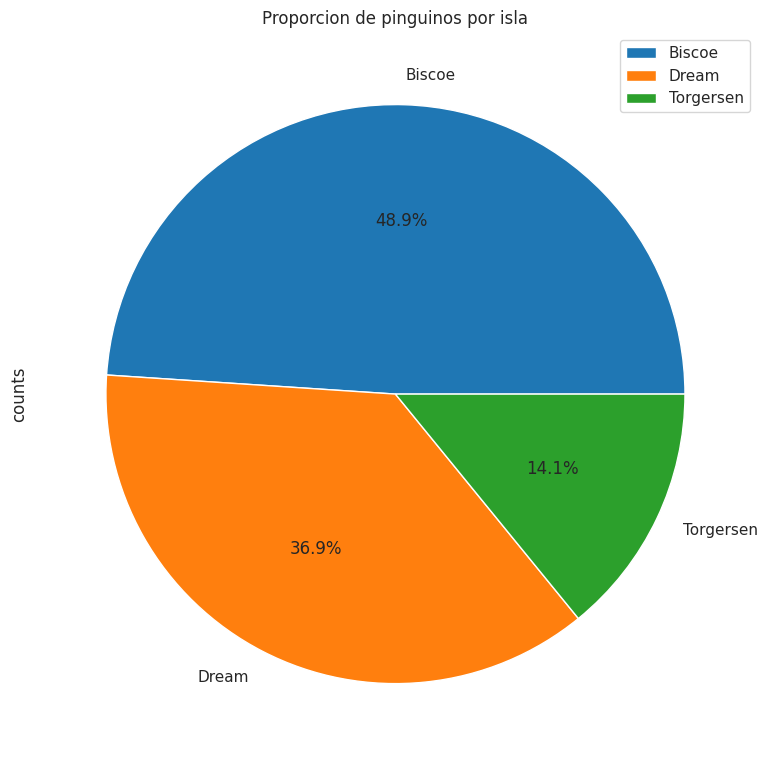

In [26]:
(
    processed_penguins_df
    .value_counts('island')
    .reset_index(name='counts')
    .groupby(['island'])
    .sum()
    .plot(
        kind='pie',
        y='counts',
        autopct='%1.1f%%',
        title='Proporcion de pinguinos por isla'
    )
)

Text(0.5, 1.0, 'Sex of penguins by island')

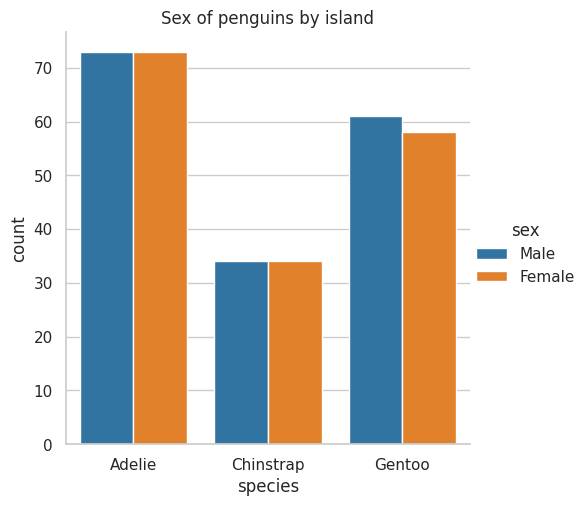

In [27]:
sns.catplot(
    data=processed_penguins_df, x='species', kind='count', hue='sex'
)
plt.title('Sex of penguins by island')

<Axes: xlabel='sex', ylabel='count'>

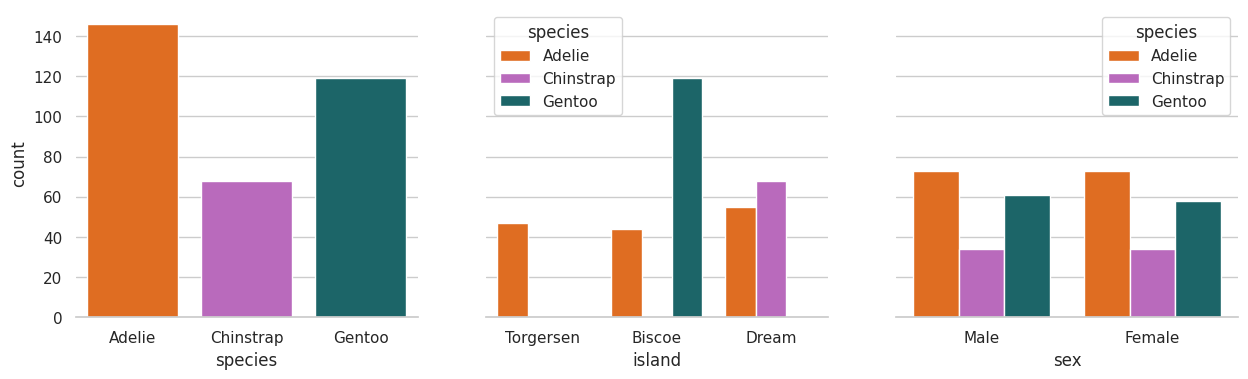

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
sns.despine(left=True)
sns.countplot(data=processed_penguins_df, x='species', hue='species', palette=penguin_colors, ax=axes[0])
sns.countplot(data=processed_penguins_df, x='island', hue='species', palette=penguin_colors, ax=axes[1])
sns.countplot(data=processed_penguins_df, x='sex', hue='species', palette=penguin_colors, ax=axes[2])

# Medidas de tendencia central

## Media o promedio

In [29]:
processed_penguins_df.bill_depth_mm.mean( numeric_only=True )

17.164864864864864

In [30]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864864

In [31]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

## Mediana

In [32]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

## Moda

In [33]:
processed_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  
0       3800.0  Male

In [34]:
# Variables categoricas
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [35]:
maximo = processed_penguins_df.max( numeric_only=True )
maximo

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [36]:
minimo = processed_penguins_df.min( numeric_only=True )
minimo

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [37]:
maximo - minimo

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [38]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

In [39]:
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [40]:
processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [41]:
# Rango intercuartilico
processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [42]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

In [43]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

variable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

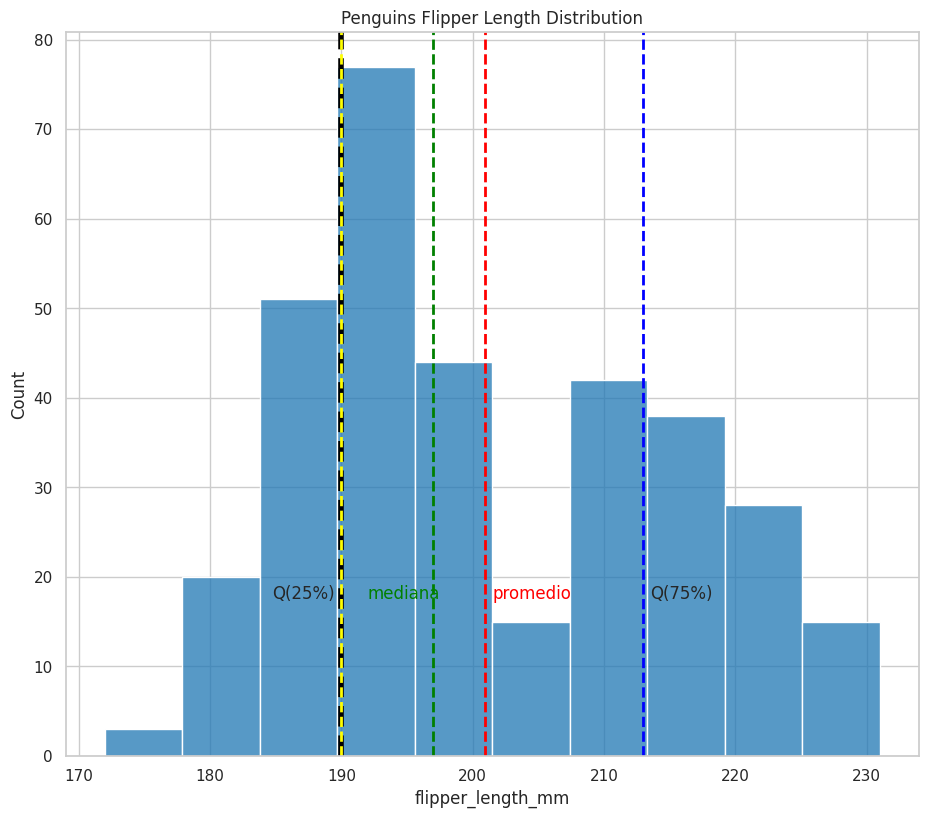

In [44]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm');

# Este seria mi promedio
plt.axvline(x=processed_penguins_df['flipper_length_mm'].mean(), color='red', linestyle='dashed', linewidth=2)

# Este seria mi desviacion mediana
plt.axvline(x=processed_penguins_df['flipper_length_mm'].median(), color='green', linestyle='dashed', linewidth=2)

# Este seria mi desviacion moda
plt.axvline(x=processed_penguins_df['flipper_length_mm'].mode().values[0], color='black', linestyle='dashed', linewidth=4)

# Este seria mi cuartil 25%
plt.axvline(x=processed_penguins_df['flipper_length_mm'].quantile(0.25), color='yellow', linestyle='dashed', linewidth=2)

# Este seria mi cuartil 75%
plt.axvline(x=processed_penguins_df['flipper_length_mm'].quantile(0.75), color='blue', linestyle='dashed', linewidth=2)

plt.title('Penguins Flipper Length Distribution')

# TItulos
plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'mediana', fontsize=12, color='g')
plt.text(201.5,17.5, 'promedio', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

En este caso, la distribución pareciera bimodal, pero se debe a que las 3 especies tienen distribuciones distintas, sin embargo, cada especie pareciera tener una distribución normal.

In [135]:
species = processed_penguins_df.species.unique()

adelie_df = processed_penguins_df.query("species == 'Adelie'")
gentoo_df = processed_penguins_df.query("species == 'Gentoo'")
chinstrap_df = processed_penguins_df.query("species == 'Chinstrap'")

specie = [adelie_df,gentoo_df,chinstrap_df]

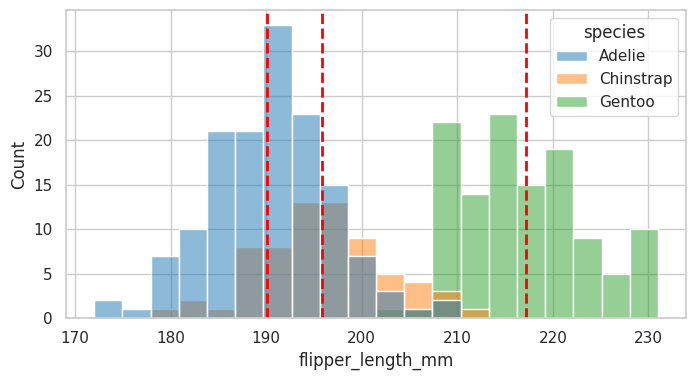

In [136]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    bins=20
)

for i in specie:
    plt.axvline(
        x=i.flipper_length_mm.mean(),
        color='red',
        linestyle='dashed',
        linewidth=2
    )

### Diagrama de caja / boxplot

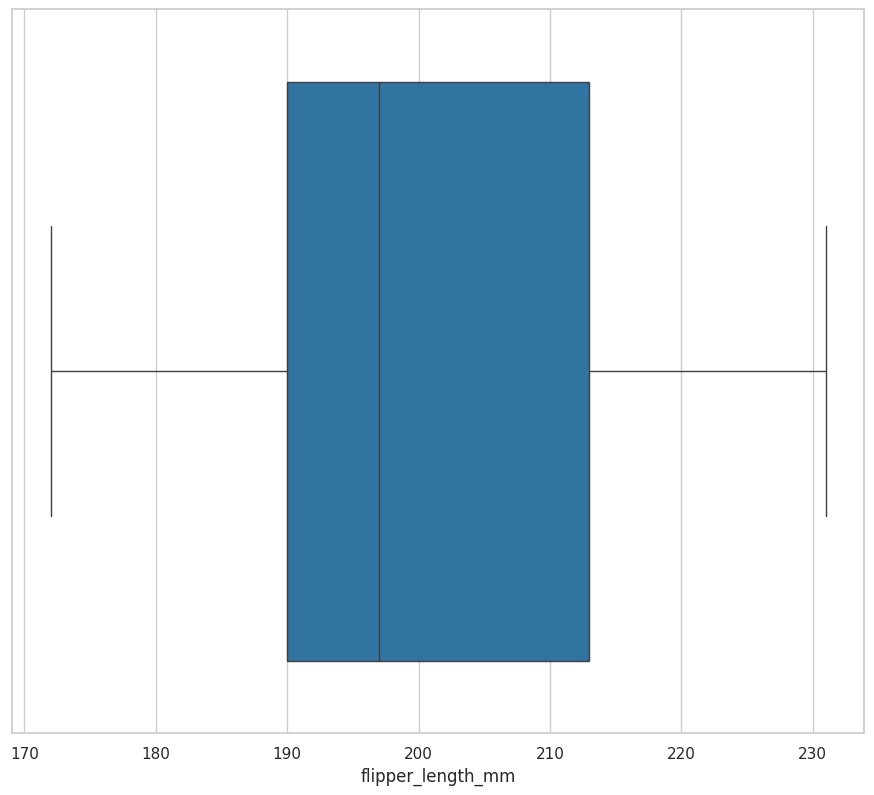

In [45]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
);

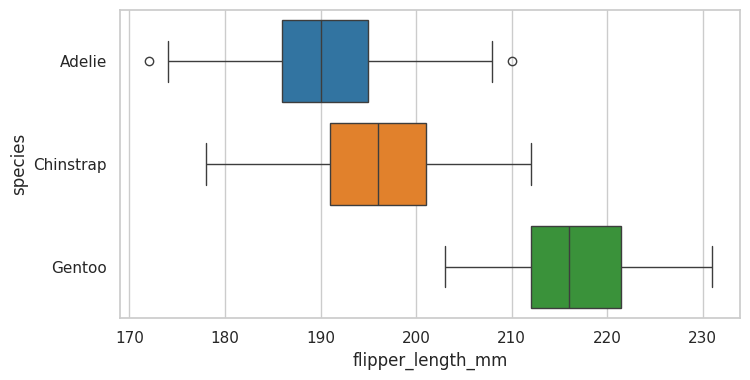

In [139]:
plt.figure(figsize=(8,4))
sns.boxplot (
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue='species'
);

## Limitaciones

In [46]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75, numeric_only=True) - x.quantile(0.25, numeric_only=True)
    N = x.size

    return 2 * IQR / N ** (1/3)

bins = freedman_diaconis_bindwidth(processed_penguins_df)
bins


bill_length_mm         1.372642
bill_depth_mm          0.467603
flipper_length_mm      3.469315
body_mass_g          184.778737
dtype: float64

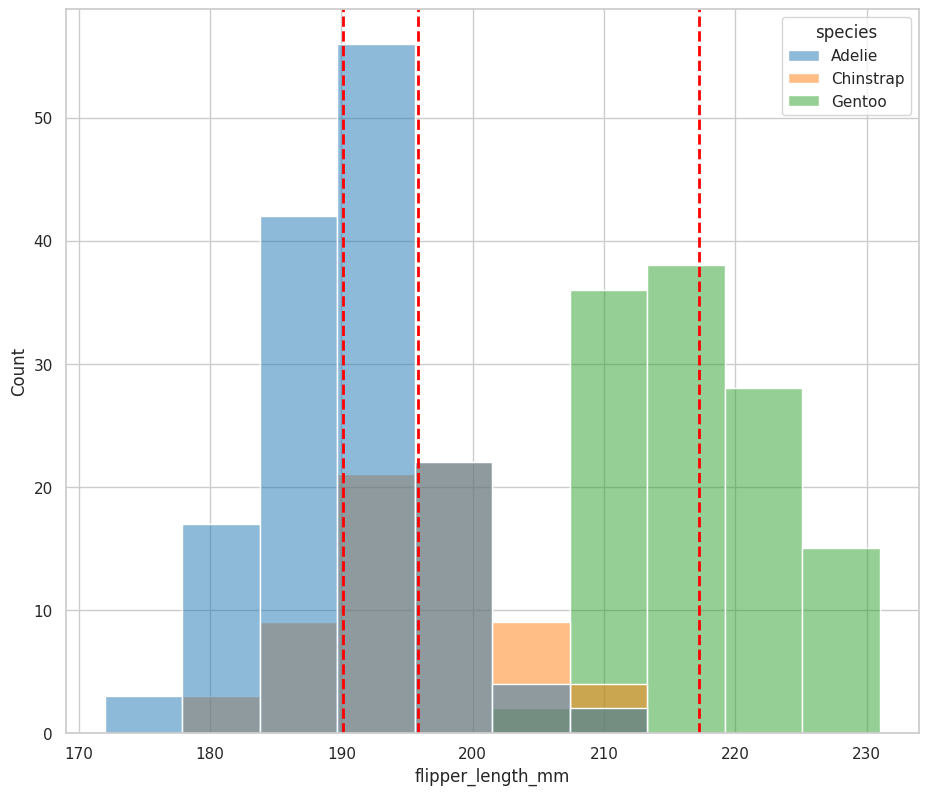

In [140]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    multiple='layer',
    # binwidth=freedman_diaconis_bindwith(penguins_df.bill_length_mm)
)

for i in specie:
    plt.axvline(
        x=i.flipper_length_mm.mean(),
        color='red',
        linestyle='dashed',
        linewidth=2
    )

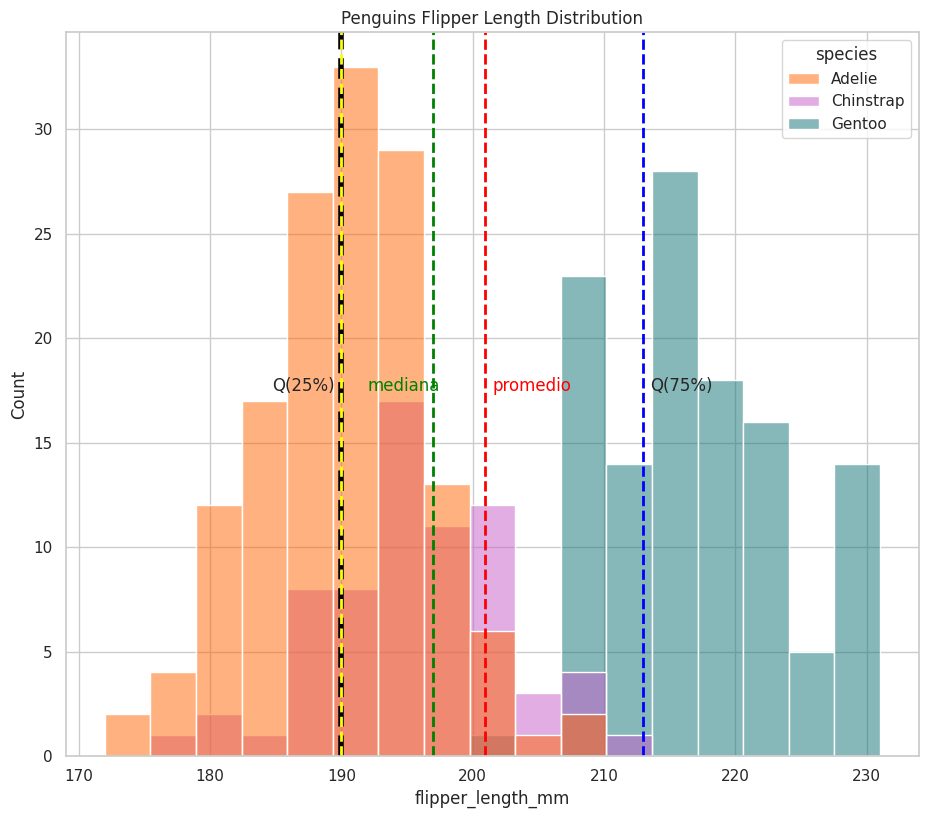

In [47]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm', hue='species', binwidth=3.469315, alpha=0.5, palette=penguin_colors);

# Este seria mi promedio
plt.axvline(x=processed_penguins_df['flipper_length_mm'].mean(), color='red', linestyle='dashed', linewidth=2)

# Este seria mi desviacion mediana
plt.axvline(x=processed_penguins_df['flipper_length_mm'].median(), color='green', linestyle='dashed', linewidth=2)

# Este seria mi desviacion moda
plt.axvline(x=processed_penguins_df['flipper_length_mm'].mode().values[0], color='black', linestyle='dashed', linewidth=4)

# Este seria mi cuartil 25%
plt.axvline(x=processed_penguins_df['flipper_length_mm'].quantile(0.25), color='yellow', linestyle='dashed', linewidth=2)

# Este seria mi cuartil 75%
plt.axvline(x=processed_penguins_df['flipper_length_mm'].quantile(0.75), color='blue', linestyle='dashed', linewidth=2)

plt.title('Penguins Flipper Length Distribution')

# TItulos
plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'mediana', fontsize=12, color='g')
plt.text(201.5,17.5, 'promedio', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

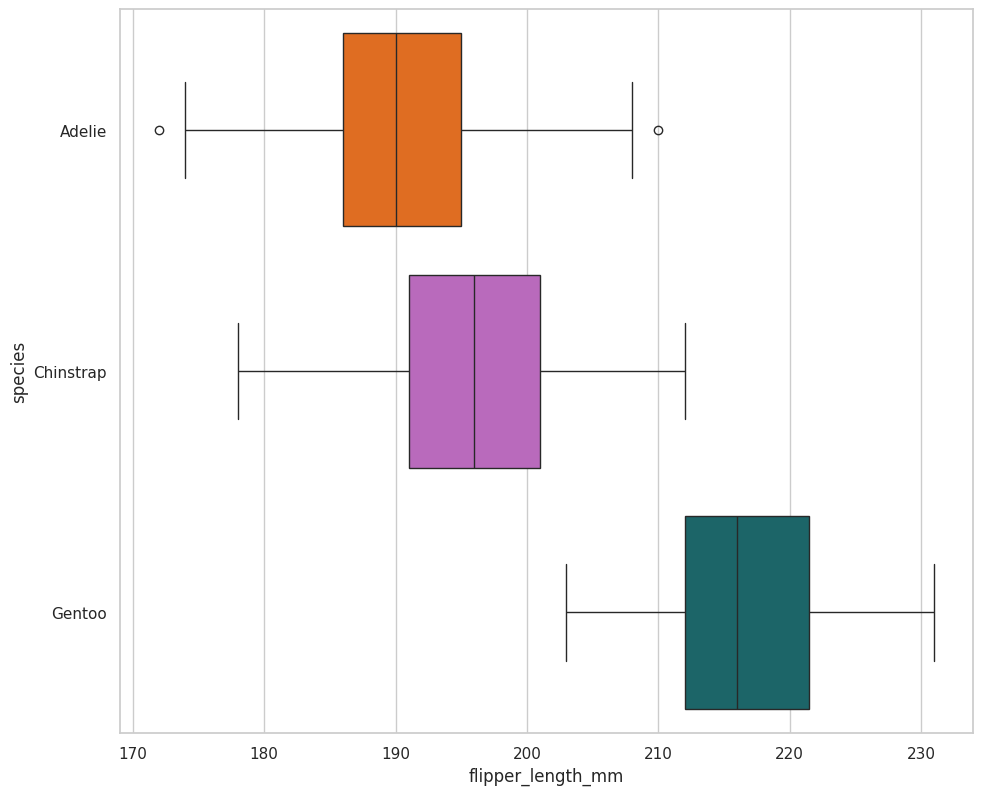

In [48]:
sns.boxplot(data=processed_penguins_df, x='flipper_length_mm', y='species', hue='species', palette=penguin_colors);

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

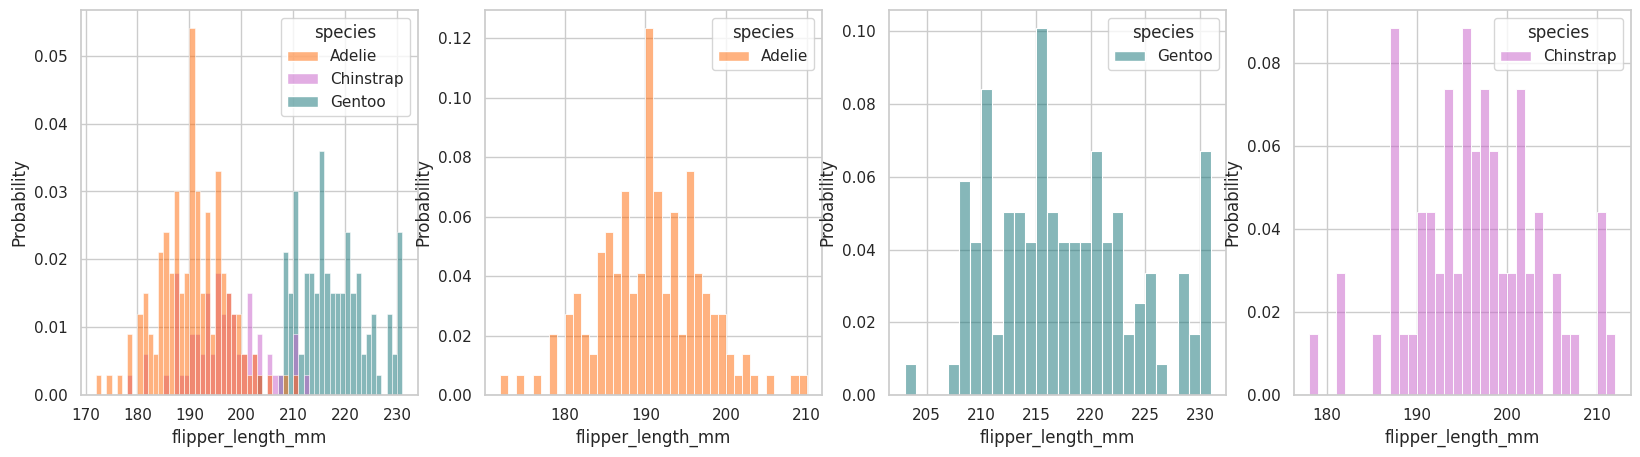

In [143]:
fig,ax = plt.subplots(ncols=4,nrows=1,figsize=(20,5))

for i in range(len(specie) + 1):
    sns.histplot(
        ax = ax[i],
        data=processed_penguins_df if i == 0 else specie[i-1],
        x='flipper_length_mm',
        binwidth=1,
        stat='probability',
        hue='species',
        palette=penguin_colors
    );

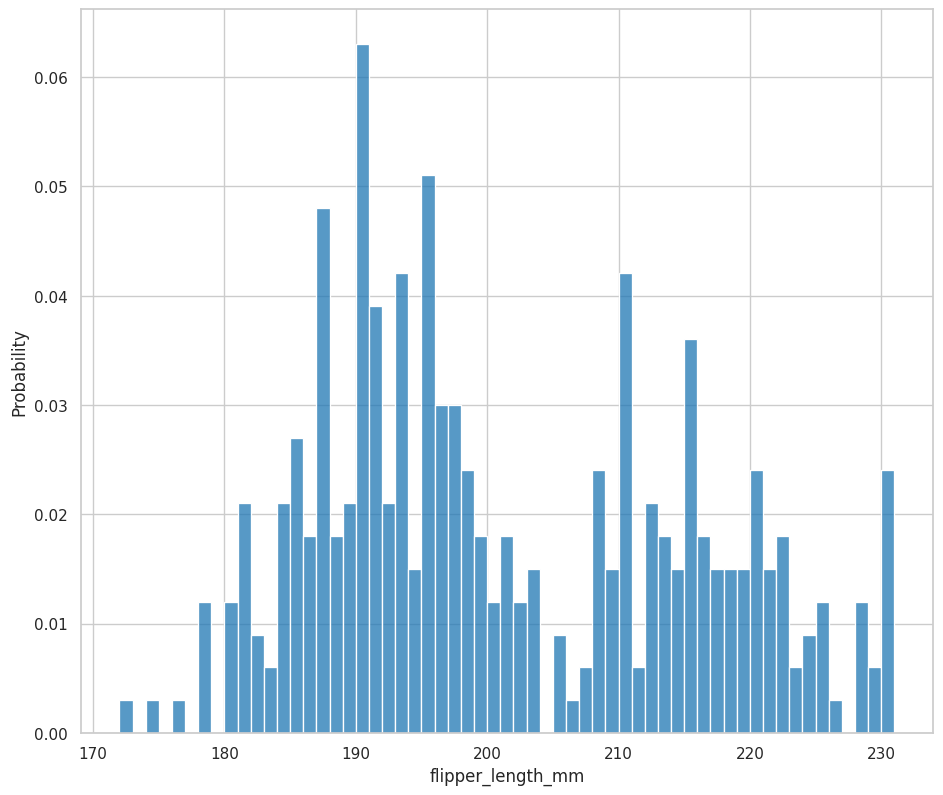

In [49]:
# Probabilidad con seaborn
sns.histplot(data=processed_penguins_df, x='flipper_length_mm', binwidth=1, stat='probability');

Nos suplimos del parámetro stat y lo configuramos con su opción 'probability', el cual permitirá comparar de manera sencilla la probabilidad de que obtengamos un valor determinado

### Utilizando `empiricaldist`

In [50]:
pmf_flipprt_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df['flipper_length_mm'],
    normalize=True
)

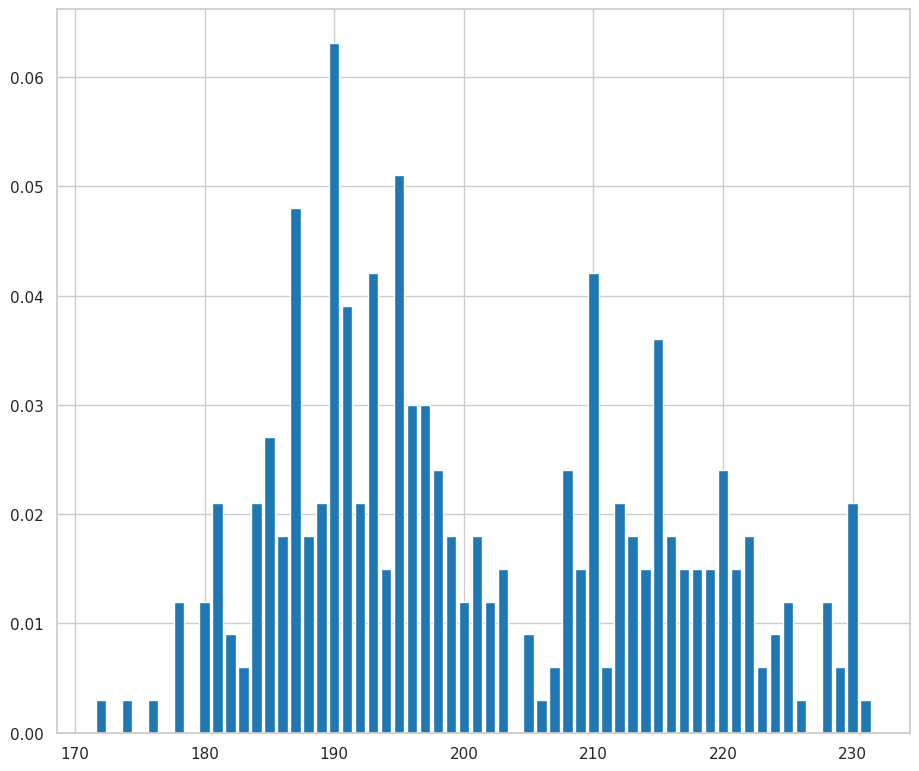

In [51]:
pmf_flipprt_length_mm.bar()

In [52]:
# Probabilidad de que encuentre un pinguinos -> 190
pmf_flipprt_length_mm(190)

0.06306306306306306

In [53]:
processed_penguins_df['flipper_length_mm'].max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizand seaborn

Realizamos el gráfico ECDF para saber cuál es la probabilidad de obtener un valor igual o menor a partir de cierto valor.

/tmp/ipykernel_1777/93465709.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(


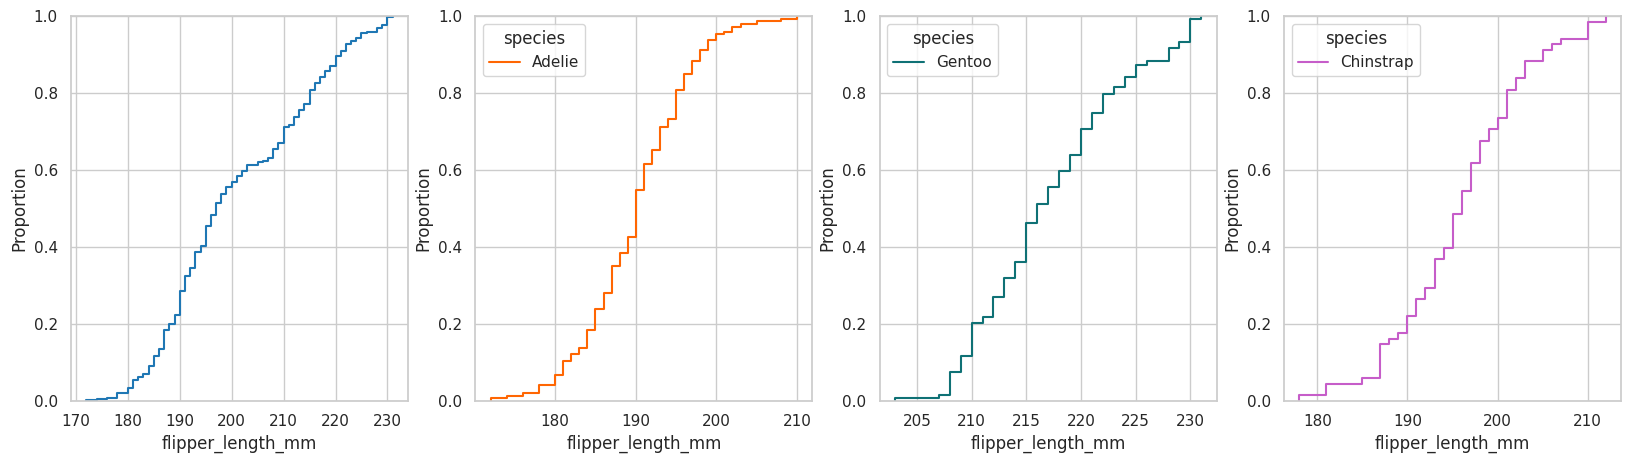

In [147]:
fig,ax = plt.subplots(ncols=4,nrows=1,figsize=(20,5))

for i in range(len(specie) + 1):
    sns.ecdfplot(
        ax = ax[i],
        data=processed_penguins_df if i == 0 else specie[i-1],
        x='flipper_length_mm',
        stat='proportion',
        hue= None if i == 0 else 'species',
        palette=penguin_colors
    );

Para realizarnos una pregunta en este caso observemos el resultado de la especie Adelie.

Si miramos en las X el valor 200, podemos preguntarnos sobre cuál es la probabilidad de que un pingüino en general (grafico 1) tenga un ala igual o menos a 200 mm de largo.

Al observar el gráfico concluimos que sería aproximadamente a ojo del más o menos 58%, lo cual es la desventaja de usar Seaborn que solo nos permite hacer una estimación visual de la pregunta que buscamos responder

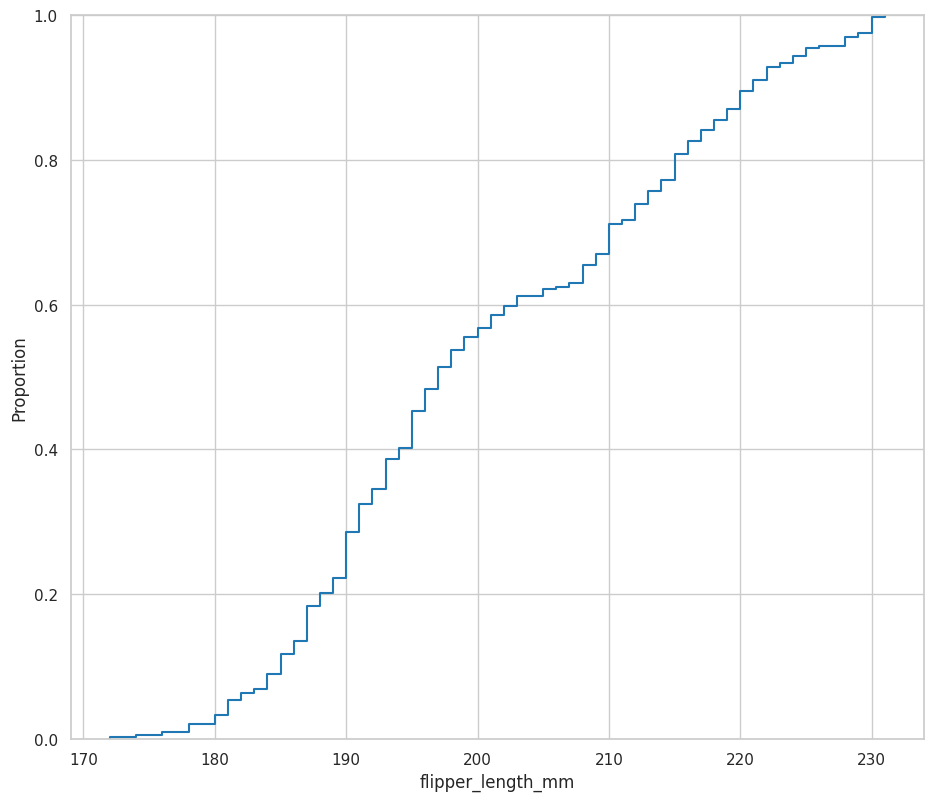

In [54]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
);

### Utilizando `empiricaldist`

In [55]:
# Calculo de la funcion de probabilidad acumulada
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df['flipper_length_mm'],
    normalize=True
)

cdf_flipper_length_mm

flipper_length_mm
172.0    0.003003
174.0    0.006006
176.0    0.009009
178.0    0.021021
180.0    0.033033
181.0    0.054054
182.0    0.063063
183.0    0.069069
184.0    0.090090
185.0    0.117117
186.0    0.135135
187.0    0.183183
188.0    0.201201
189.0    0.222222
190.0    0.285285
191.0    0.324324
192.0    0.345345
193.0    0.387387
194.0    0.402402
195.0    0.453453
196.0    0.483483
197.0    0.513514
198.0    0.537538
199.0    0.555556
200.0    0.567568
201.0    0.585586
202.0    0.597598
203.0    0.612613
205.0    0.621622
206.0    0.624625
207.0    0.630631
208.0    0.654655
209.0    0.669670
210.0    0.711712
211.0    0.717718
212.0    0.738739
213.0    0.756757
214.0    0.771772
215.0    0.807808
216.0    0.825826
217.0    0.840841
218.0    0.855856
219.0    0.870871
220.0    0.894895
221.0    0.909910
222.0    0.927928
223.0    0.933934
224.0    0.942943
225.0    0.954955
226.0    0.957958
228.0    0.969970
229.0    0.975976
230.0    0.996997
231.0    1.000000
Name: count, dtype: float64

La probabilidad de que la longitud del flanco sea menor o igual 200 es 0.57%.


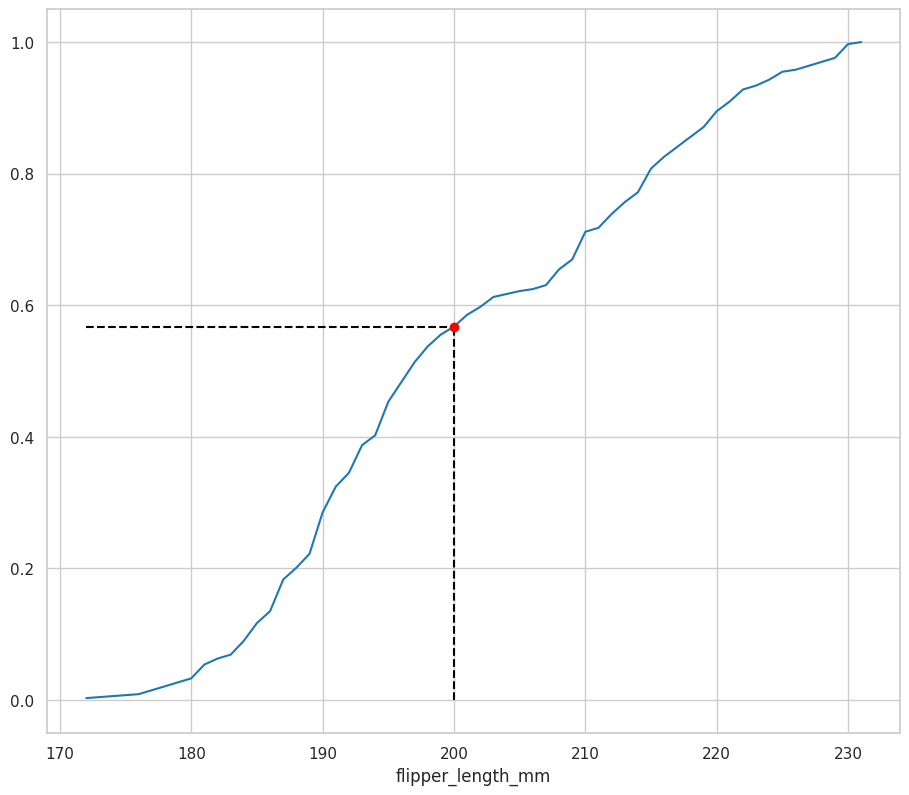

In [56]:
cdf_flipper_length_mm.plot();

# Cantidad. --> Todos los menores o iguales a 200.
q = 200
# Probabilidad
p = cdf_flipper_length_mm.forward(q)

# Barra de vertical
plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

# Barra horizontal
plt.hlines(
    y=p,
    xmin=pmf_flipprt_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')

print(f'La probabilidad de que la longitud del flanco sea menor o igual {q} es {p:.2f}%.')

De esta manera podemos añadir líneas guías que nos ayuden a visualizar estos valores, en este caso realizamos unas líneas guías para saber en donde encontrar el valor de 200 y su probabilidad, de esta forma podemos empezar a explorar distintas variables sin vernos afectados por valores extremos

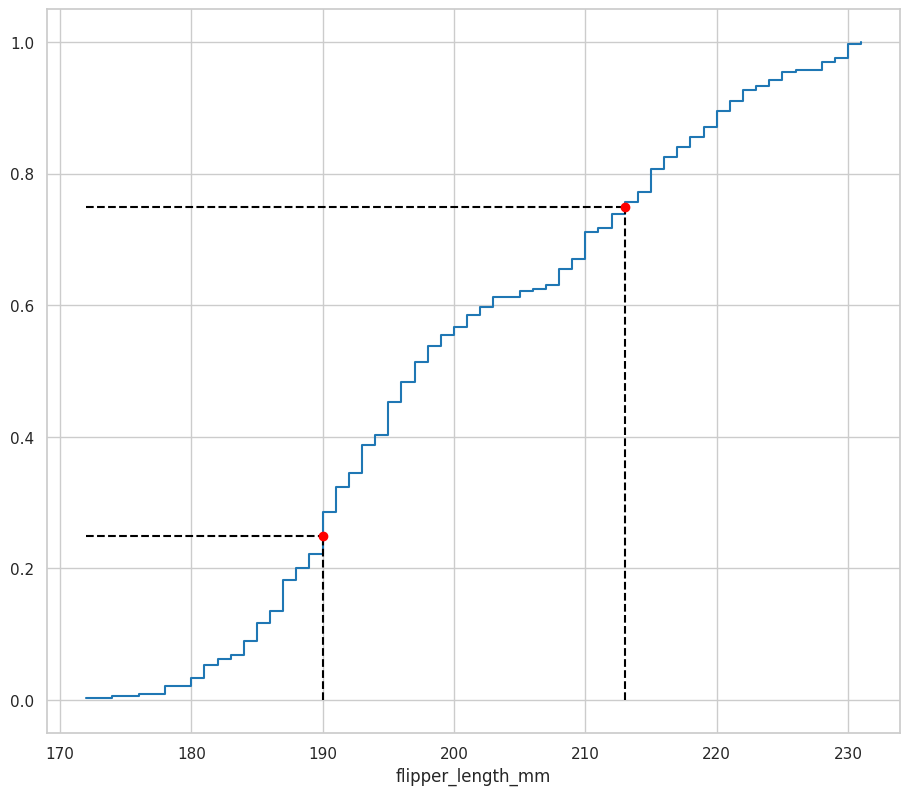

In [57]:
# Calculo de un valor en funcion de la probablidad dad
cdf_flipper_length_mm.step()

# Especificando la probabilidad
p_1 = 0.25
p_2 = 0.75

ps = (p_2, p_1) # IQR

# Obtener el valor dada la probabilidad
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyles='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipprt_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyles='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

La función de distribución acumulada está relacionado con el manejo de los cuartiles, ya que si marcamos la probabilidad de encontrar el 25% y 75% de nuestros datos, ya nos encontraríamos delimitando nuestro rango intercuartílico, que es lo que realizamos en la gráfica.

### Comparando distribuciones

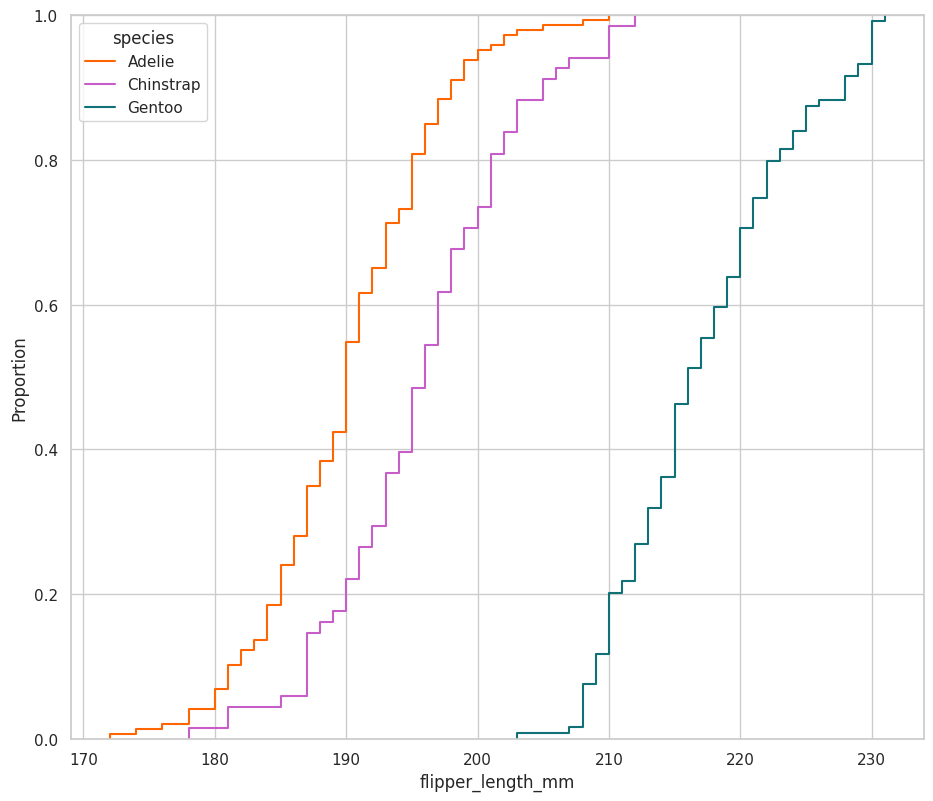

In [58]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_colors
);

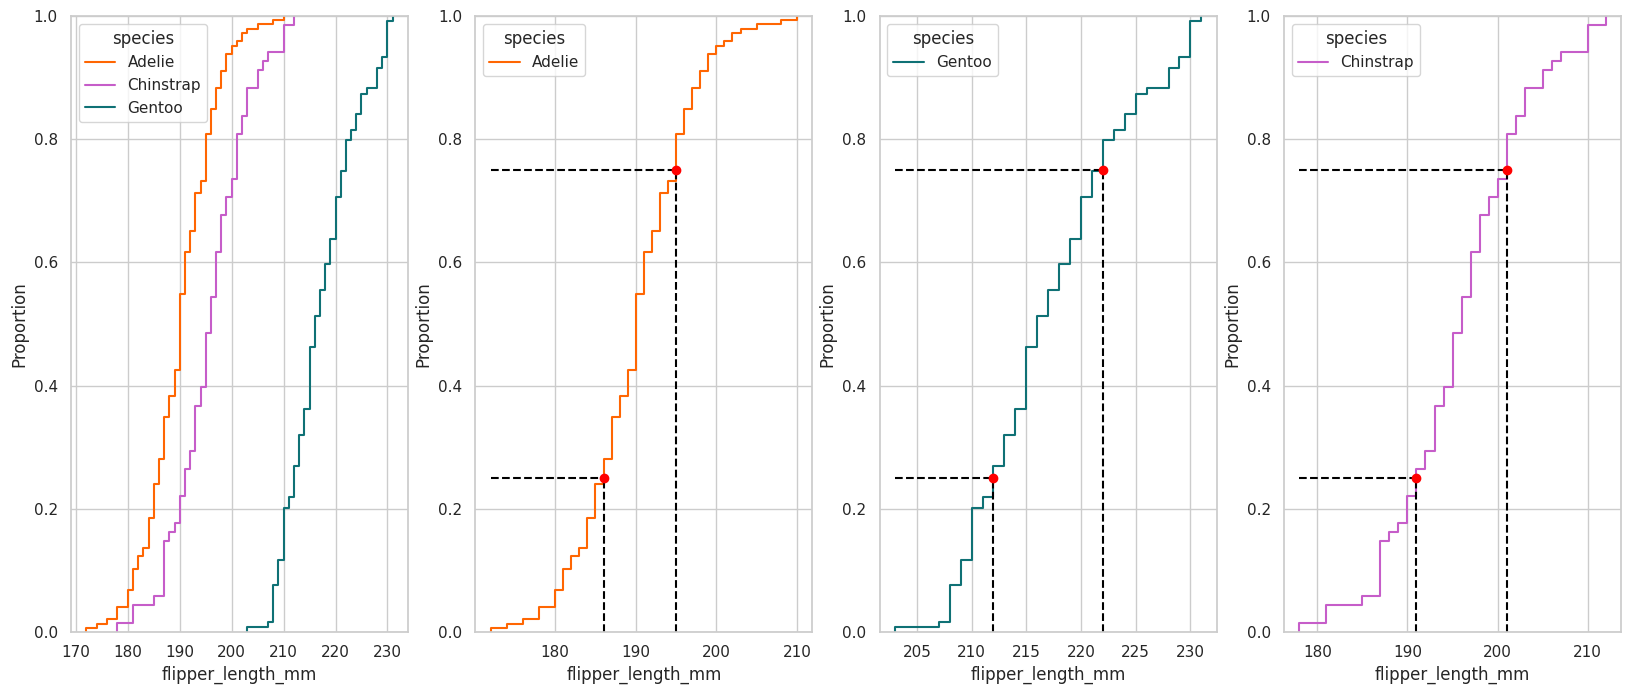

In [148]:
fig,ax = plt.subplots(1,4,figsize=(20,8))

p_1 = 0.25 # specifi probability
p_2 = 0.75
ps = (p_1, p_2) # IQR

for i in range(len(species)+1):
    sns.ecdfplot(
    ax = ax[i],
    data=processed_penguins_df if i == 0 else specie[i-1],
    x='flipper_length_mm',
    hue='species',
    palette=penguin_colors
    )
    
    qs = empiricaldist.Cdf.from_seq(processed_penguins_df.flipper_length_mm if i ==0 else specie[i-1].flipper_length_mm,normalize=True).inverse(ps)

    if i == 0:
        pass
    else:
        ax[i].vlines(
            x=qs,
            ymin=0,
            ymax=ps,
            linestyles='--',color='black',
        )
        ax[i].hlines(
            y=ps,
            xmin=empiricaldist.Cdf.from_seq(specie[i-1].flipper_length_mm,normalize=True).qs[0],
            xmax=qs,
            linestyles='--',color='black',
        )
        ax[i].plot(qs,ps,'ro') # puntos de interseccion

### PDF: Funciones de densidad de probabilidad

Nos ayudan a estimar la probabilidad para valores que no contiene el dataset, formando una distribución continua. También son útiles para ver la forma de la distribución a detalle y hacer comparaciones con la distribución teórica.

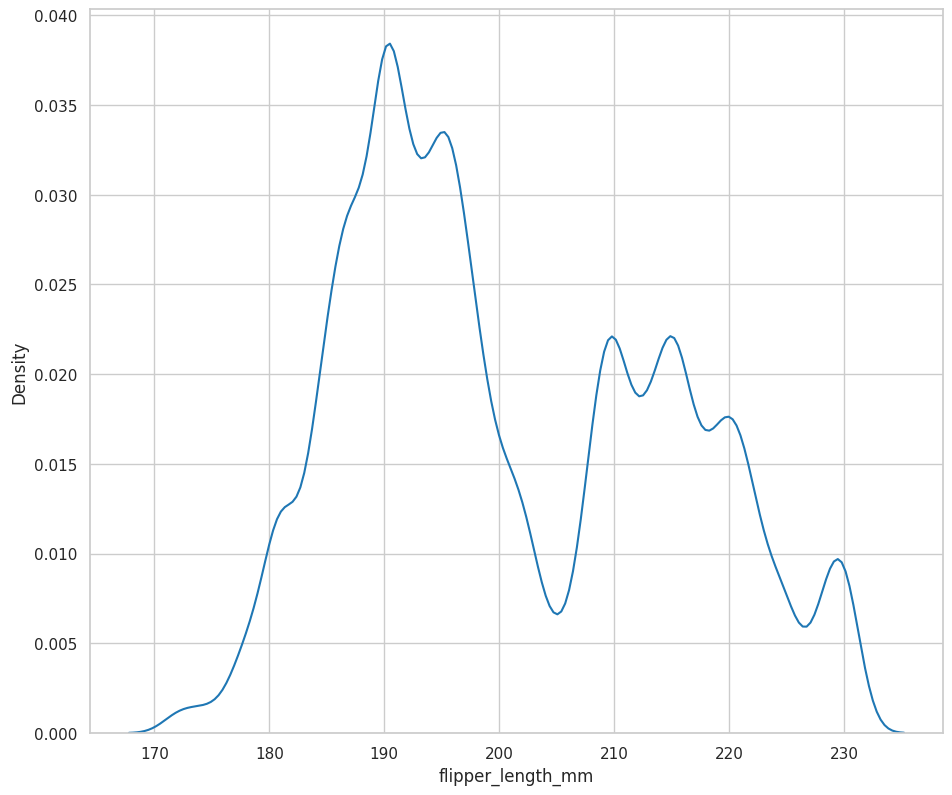

In [59]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1 #ancho de banda
);

In [60]:
# Ver estadisticos
stats = processed_penguins_df['body_mass_g'].describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

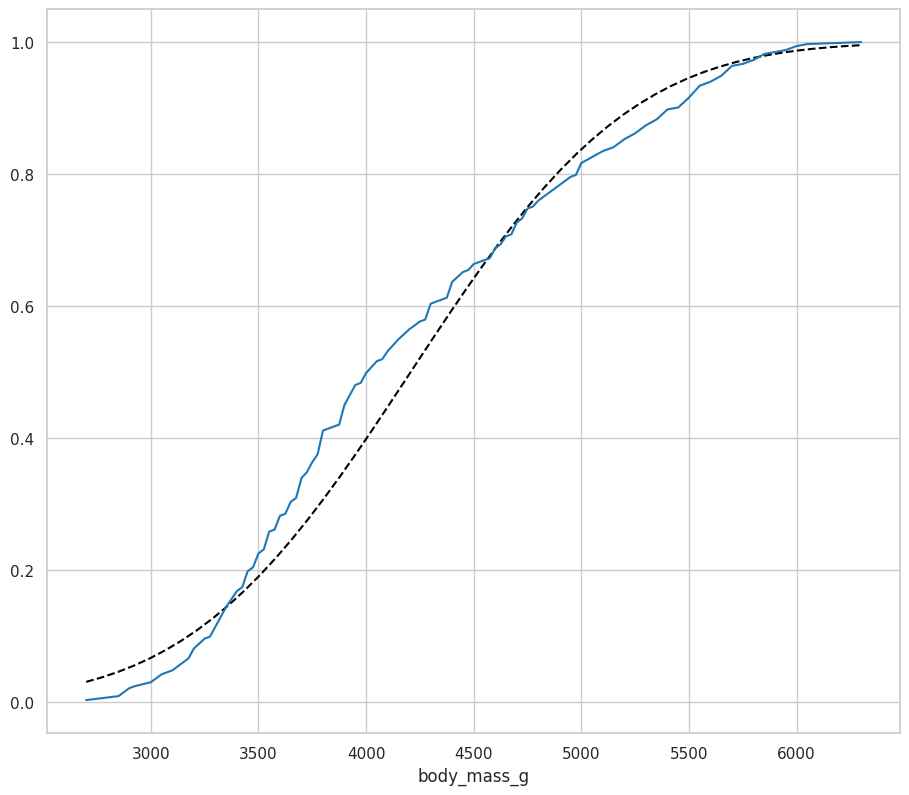

In [61]:
# Generar datos aleatorio a partir de los estadisticos de los datos
# Utilizando el ECDFs
xs = np.linspace(stats['min'], stats['max'])

# Arreglo de valores aleatorios
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) # Valores de probabilidad para cada valor

# Graficar de la distrubucion de datos aleatorios
plt.plot(xs, ys, color='black', linestyle='dashed')

# Grafica de la distribucion de los datos reales

empiricaldist.Cdf.from_seq(
    processed_penguins_df['body_mass_g'],
    normalize=True
).plot()

plt.show()

Ahora tenemos nuestra función de cuanto pesa un pingüino comparado de como seria si aleatoriamente nuestros datos tuvieran un comportamiento de distribución normal.

Como podemos ver, hay zonas del gráfico en que la distribución teórica se parece a los datos reales de los pingüinos, pero en otras que no, por ejemplo nuestra distribución normal teórica se encuentra por debajo de los datos reales, siendo que la línea azul está por encima de la línea negra y en otras ocurre lo opuesto

De este modo vemos que los datos no se comportan de una manera normal, ya que es un caso de uso para las funciones acumuladas de probabilidad, pero a mismo modo también estamos interesados en las funciones de densidad de probabilidad.

### Comparando la distribución de los datos con la teórica utilizando PDFs

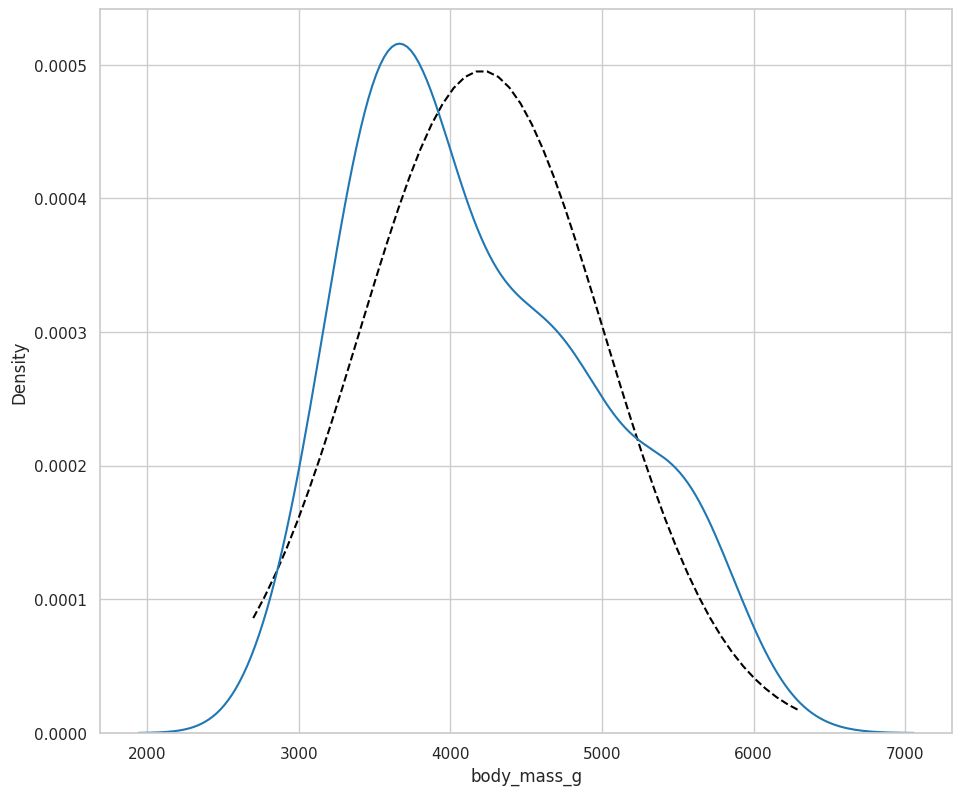

In [62]:
# Comparando la distribución de los datos con la teórica utilizando PDFs
xs = np.linspace(stats['min'], stats['max'])

# Arreglo de valores aleatorios
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) # Valores de probabilidad para cada valor

# Graficar de la distrubucion de datos aleatorios
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(data=processed_penguins_df, x='body_mass_g')

plt.show()

Ahora tenemos otra forma donde podemos interpretar nuestros datos, teniendo nuestra distribución teórica siendo representada por las líneas negras y los datos recolectados por las líneas azules.

Podemos diferenciar como nuestra distribución se encuentra positivamente sesgada a la izquierda, dándonos la idea de que nuestros datos no siguen una distribución normal.

Esto es importante, ya que en el mundo de los datos muchos de los estadísticos, pruebas, o análisis asumirán muchas cosas y donde una esas cosas es que tus datos seguirán una distribución normal, tanto los datos como los residuos al ajustar un modelo.

In [63]:
species = processed_penguins_df['species'].unique()

numeric_columns = processed_penguins_df.select_dtypes(include=np.number).columns
# categories = processed_penguins_df.select_dtypes(include=float).keys()

# Filtros
adelie_df = processed_penguins_df.query('species == "Adelie"')

chinstrap_df = processed_penguins_df.query('species == "Chinstrap"')

gentoo_df = processed_penguins_df.query('species == "Gentoo"')

specie = [adelie_df, chinstrap_df, gentoo_df]


*Pero si analizamos cada variable dividida por especie podemos ver que la distribución empírica se adapta mejor a la distribución teórica*

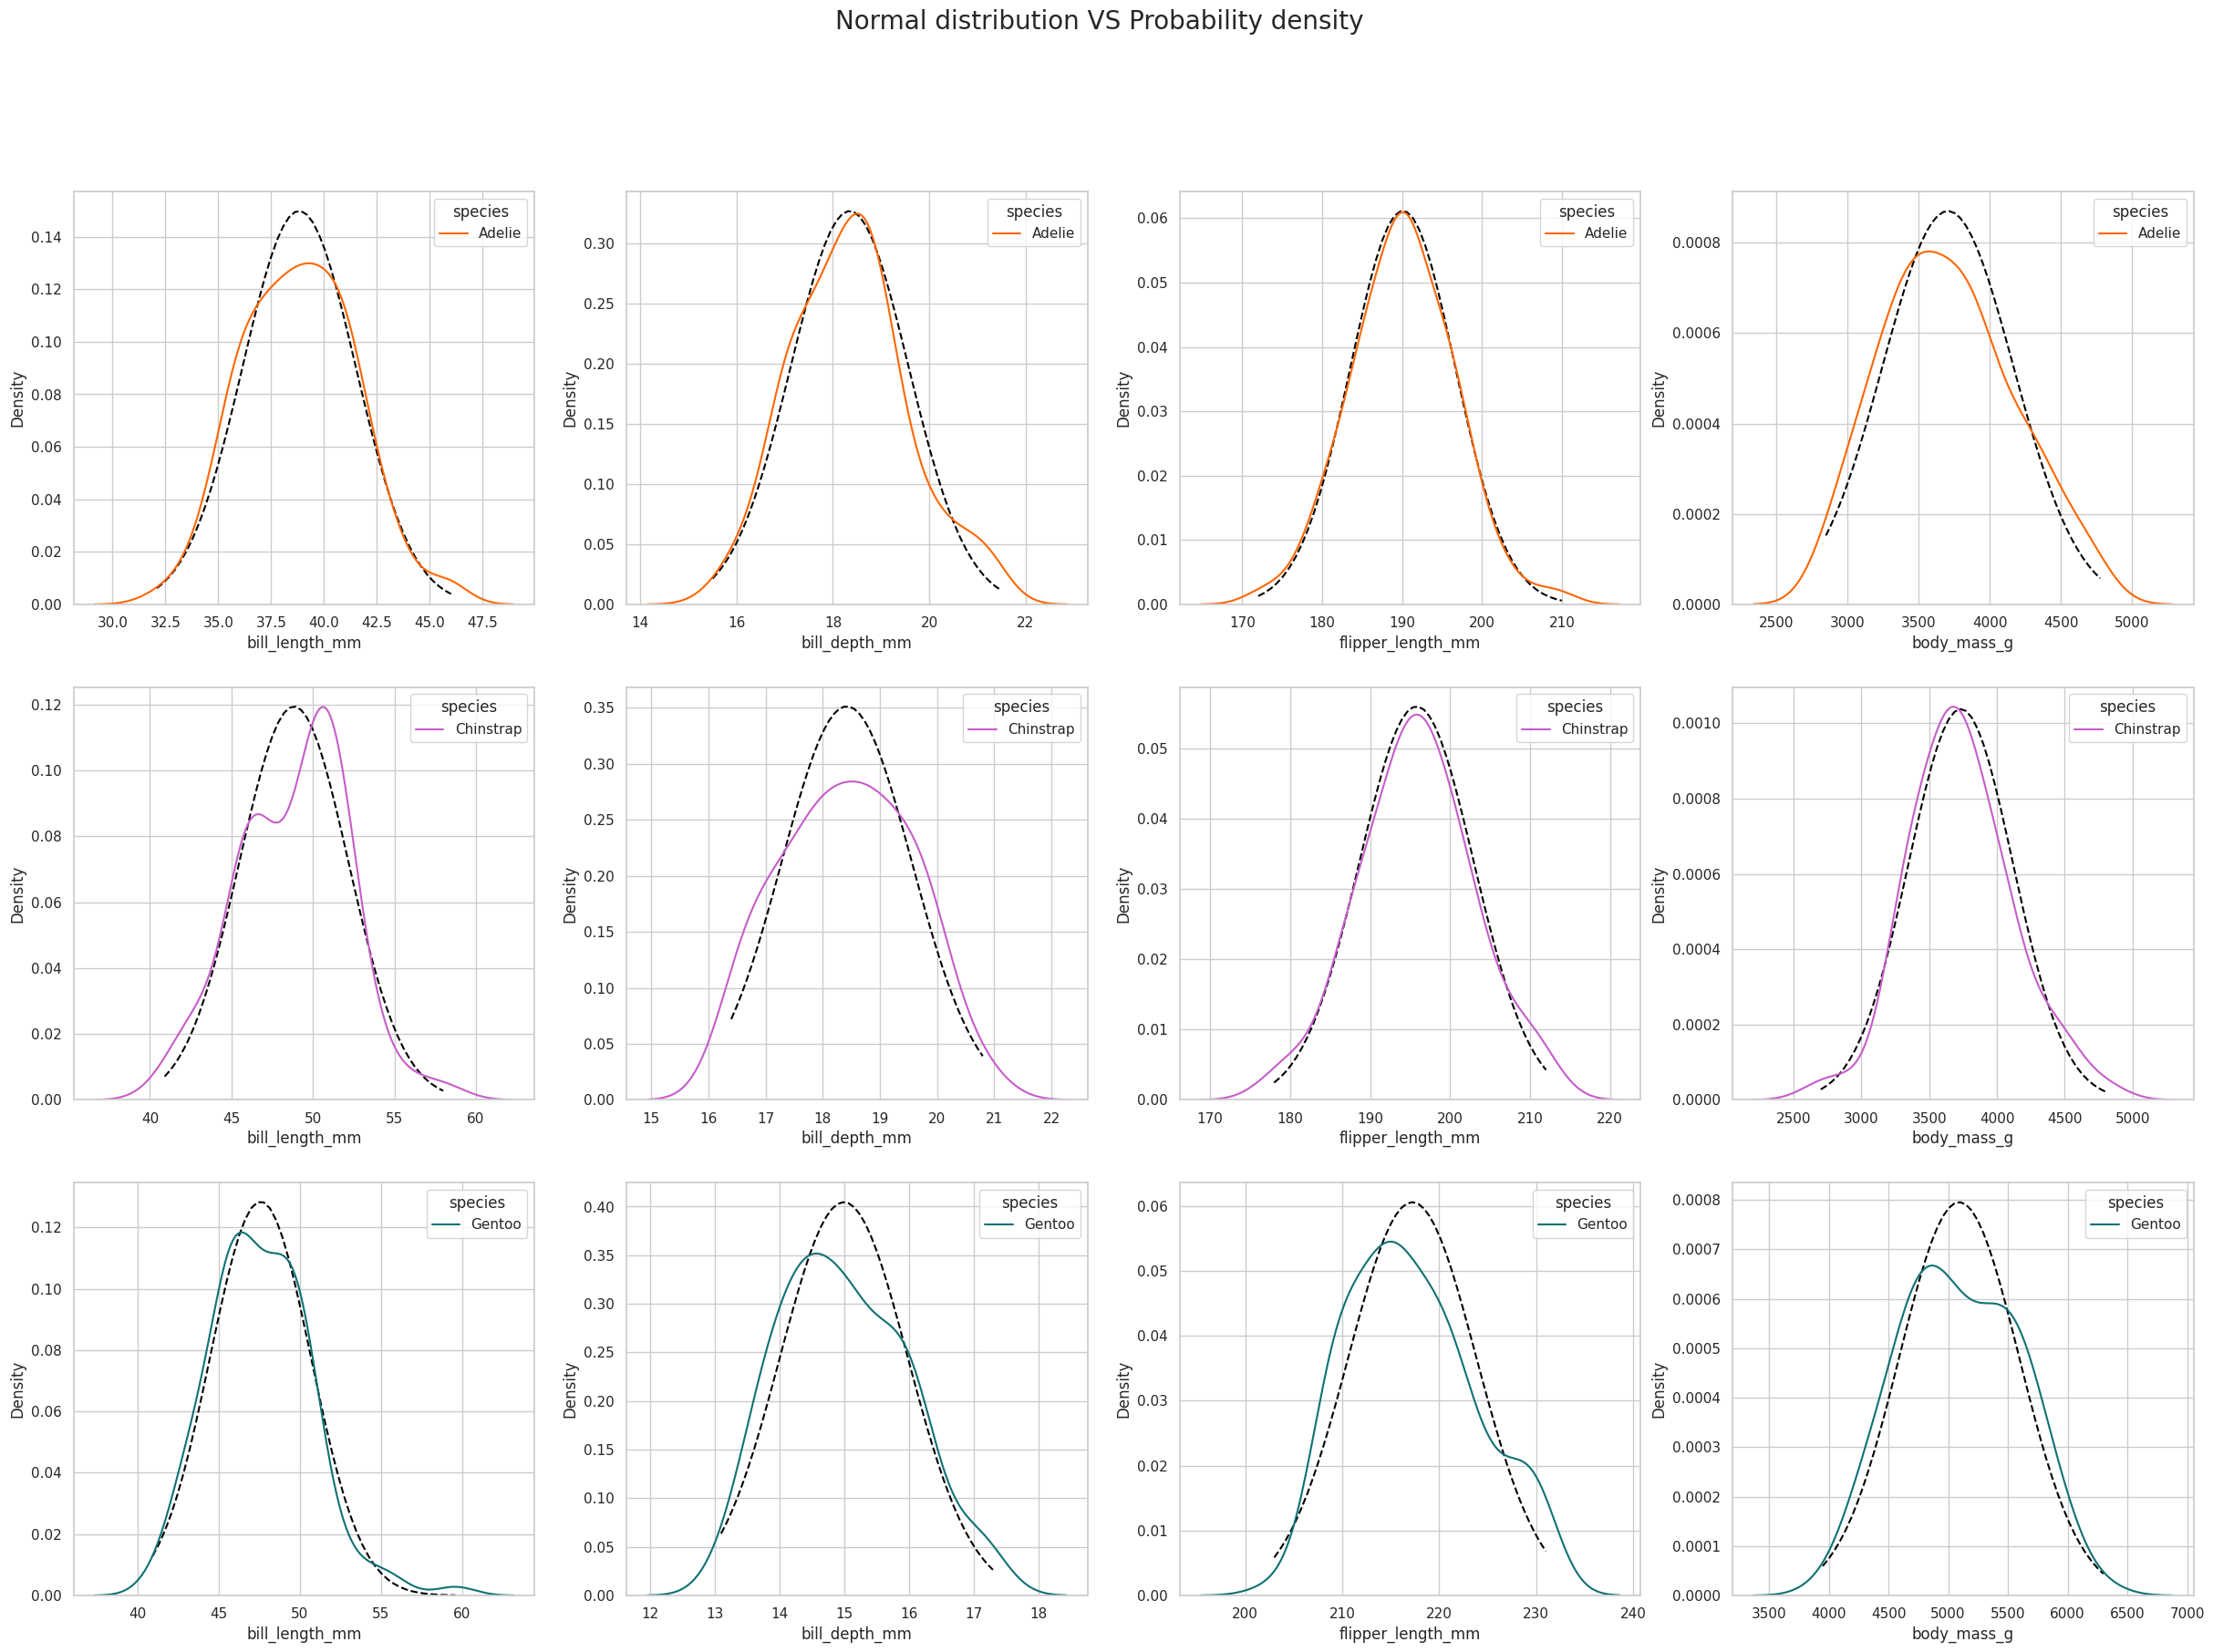

In [64]:
# Grafica
fig, ax = plt.subplots(3, 4, figsize=(30, 20))
fig.suptitle('Normal distribution VS Probability density', fontsize=20)

for i, i_col in enumerate(specie):
    for j, j_col in enumerate(numeric_columns):
        stats = i_col[j_col].describe()

        xs = np.linspace(stats['min'], stats['max'])
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs, ys, color='black', linestyle='--')

        sns.kdeplot(data=i_col, ax=ax[i][j], x=j_col, hue='species', palette=penguin_colors)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

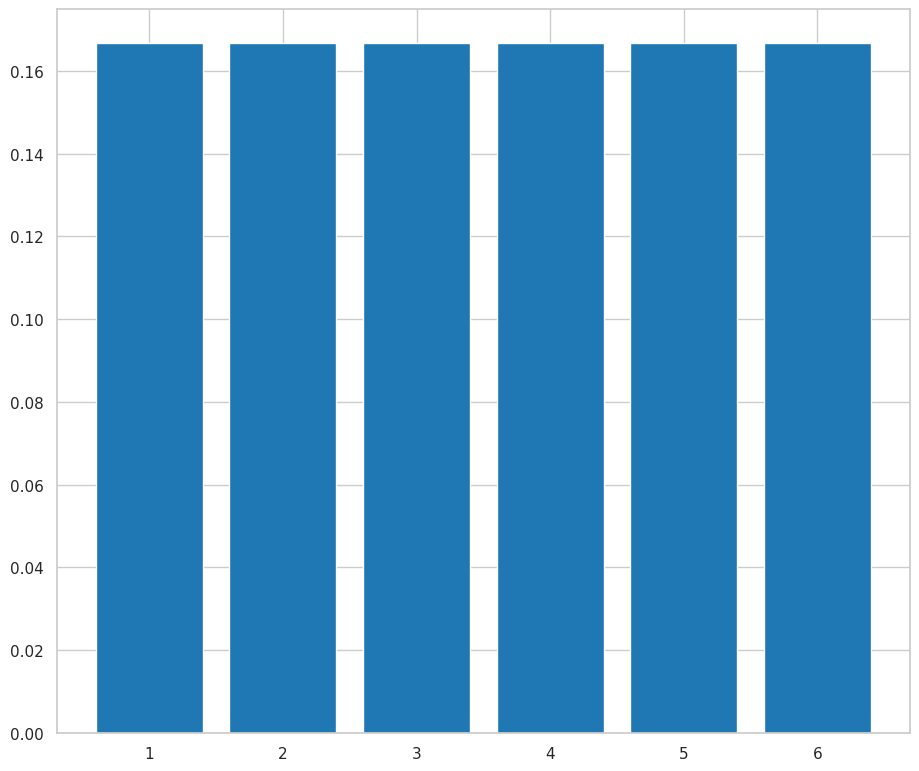

In [65]:
# Dato
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])

dice.bar()

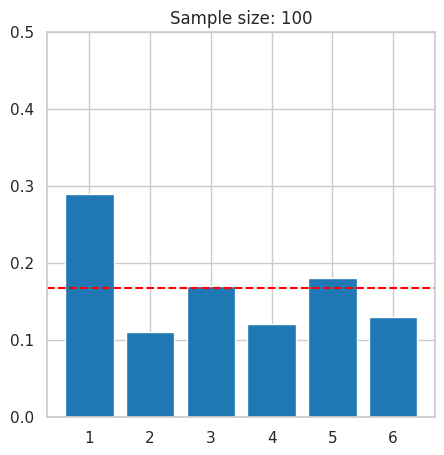

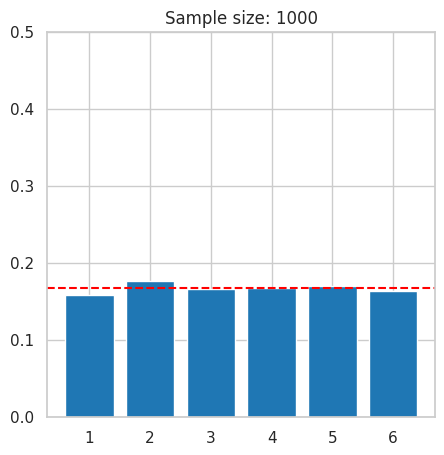

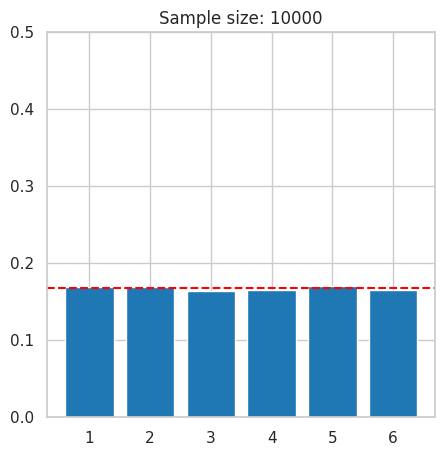

In [66]:
# Explorando la ley de los grandes numeros
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    # Figura
    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    # Linea para referencia
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    # Set limite para todas las graficas
    plt.ylim([0, 0.50])
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central

In [67]:
# Proporcion de machos y hembras
processed_penguins_df['sex'].value_counts(normalize=True)

sex
Male      0.504505
Female    0.495495
Name: proportion, dtype: float64

La variable sex sigue una distribución binomial. Como es categórica, debemos convertirla en una variable numérica

In [68]:
# como es una distribucion binomial le podemos hacer un replace para convertir de letras a numeros
sex_numeric = processed_penguins_df['sex'].replace(['Male', 'Female'], [1, 0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex, Length: 333, dtype: int64

Fijamos el número de muestras a tomar y el tamaño de cada muestra, luego calculamos la media de los machos de cada muestra y a todas ellas le sacamos la media observando así que se aproxima a la proporción de machos dada por los datos

In [69]:

# Muestas
number_sample = 1000
# Cada muestra saca 35 pinguino
sample_size = 35

# Cual es la proporcion de machos en en muestreo

np.random.seed(42)

samples_list = []

for i in range(1, number_sample + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    samples_list.append(sex_numeric_sample)
    
samples_df = pd.DataFrame(np.column_stack(samples_list), columns=[f"sample_{i}" for i in range(1, number_sample + 1)])

male_population_mean = samples_df.mean().mean()
print(f'Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%')

Estimated percentage of male penguins in population is: 50.4457%


La distribución binomial se convierte en este caso en una distribución Normal, como se evidencia en la gráfica que sigue

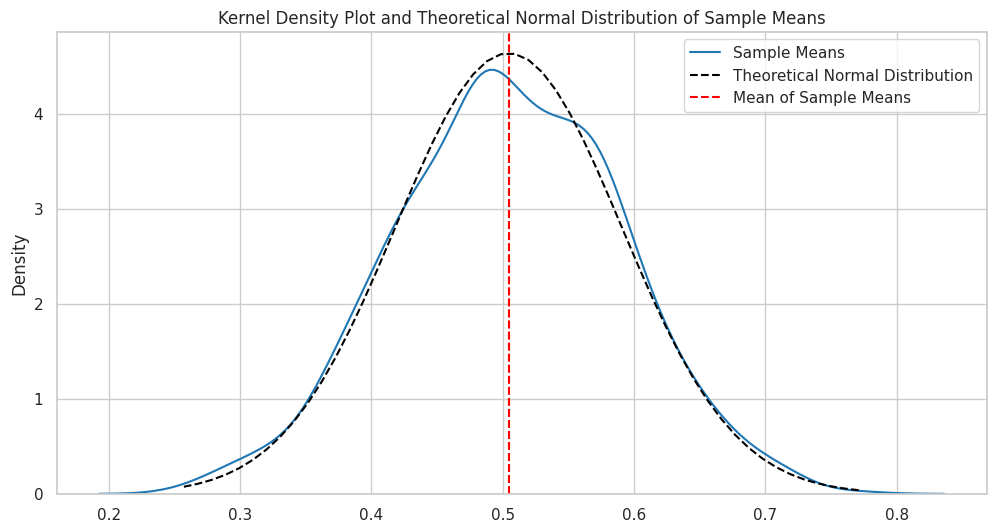

In [70]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])

# Set a wider figure size
plt.figure(figsize=(12, 6))

# La muestra de la media binomial
sns.kdeplot(data=sample_means_binomial, label='Sample Means')
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

# Calculo estadistico para la muestra de la media binomial

sample_means_stats = {
    'mean': sample_means_binomial['sample_mean'].mean(),
    'std': sample_means_binomial['sample_mean'].std(),
    'min': sample_means_binomial['sample_mean'].min(),
    'max': sample_means_binomial['sample_mean'].max()
}

# Generar valores x para el distribucion normal teorica
xs = np.linspace(sample_means_stats['min'], sample_means_stats['max'], 50)

# Calcular la probabilidad PDF para la distribucion normal teorica

ys = scipy.stats.norm(sample_means_stats['mean'], sample_means_stats['std']).pdf(xs)

# Graficar la distribucion normal teorica
plt.plot(xs, ys, color='black', linestyle='dashed', label='Theoretical Normal Distribution')

plt.axvline(x=sample_means_stats['mean'], color='red', linestyle='dashed', label='Mean of Sample Means')

plt.title('Kernel Density Plot and Theoretical Normal Distribution of Sample Means')
plt.legend()
plt.show()


Otra manera de verlo es ir incrementando la cantidad de muestras y observar el efecto en la proporción de machos, vemos como

In [71]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean()] for i in range(1, number_sample + 1)],
    columns=["sample_size", "estimated_mean"]
)

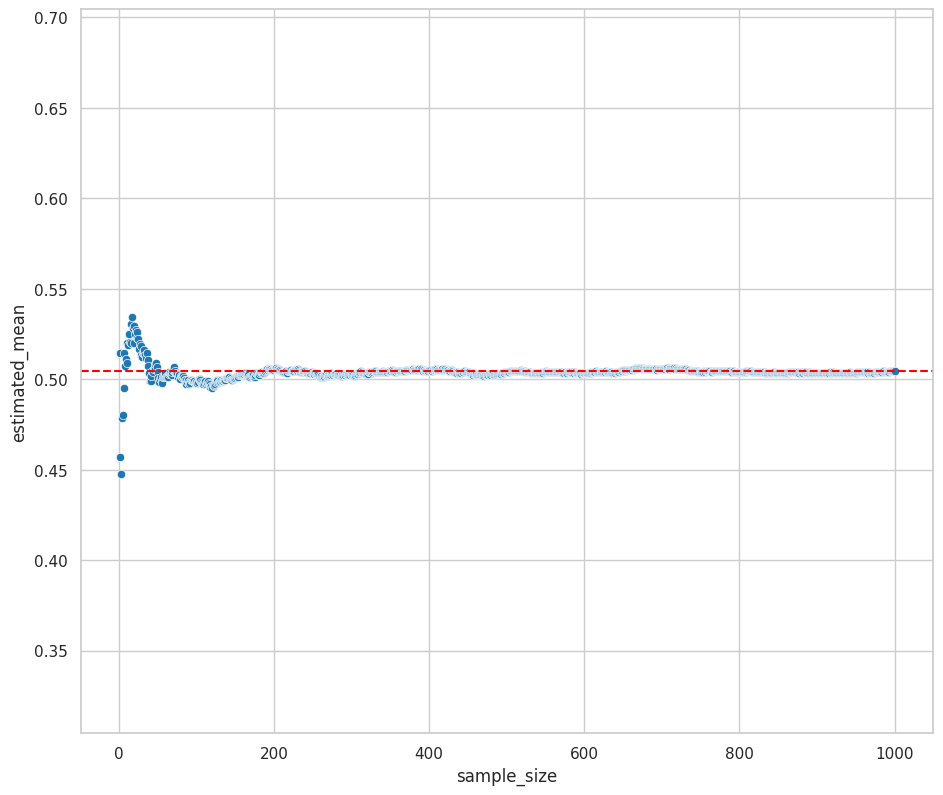

In [72]:
sns.scatterplot(
    data=sample_size_experiment,
    x="sample_size",
    y="estimated_mean",
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])
plt.show()

Conforme vayamos incrementando el tamaño de la muestra (Nuestro eje X) se va acercando a nuestra línea roja que representa la media estimada (Nuestro eje Y), por lo que pasamos de una distribución binomial a tener una distribución normal de las medias que representan la proporción de nuestros pingüinos de la población.

# Estableciendo relaciones: Gráfica de puntos

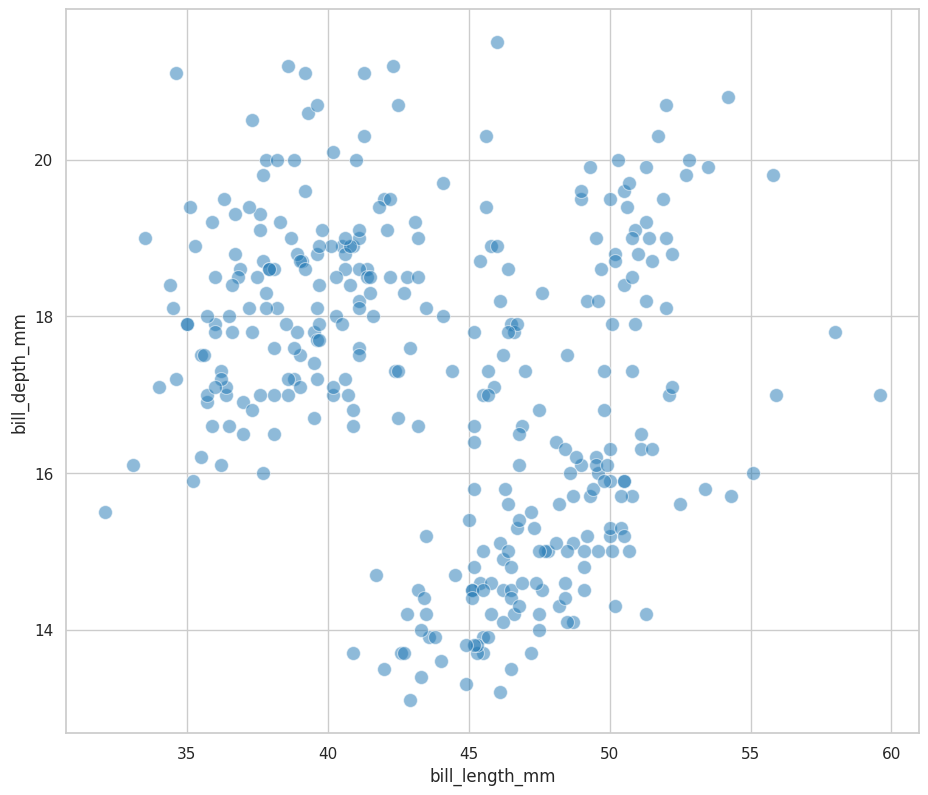

In [73]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2, # 2 puntos en el mismo lugar
    s=100
);

Utilizar histogramas de dos dimensiones. Cuenta los valores que quedan dentro de un intervalo de la variable X y un intervalo de la variable ‘Y’ y muestra la frecuencia usando una barra de colores.

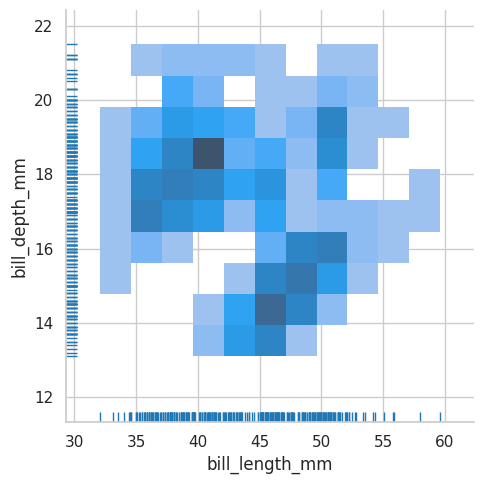

In [74]:
# Histograma de frecuencia
sns.displot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    rug=True
);

En vez de hacer un histograma 2D, también podemos hacer una estimación de las densidades de nuestros pingüinos, así podemos ver como nuestros datos se acumulan en 2 focos principales y en 1 con menor densidad en la zona de arriba

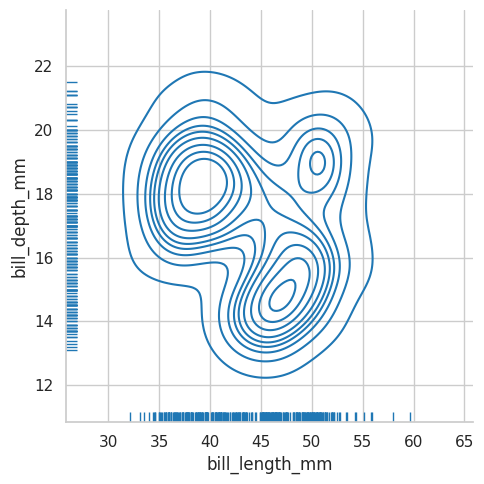

In [75]:
# Probabilida de densidad
sns.displot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    rug=True,
    kind="kde",
);

Otra cosa que podemos hacer es combinar múltiples gráficos para que nos facilite entender la distribución de las variables

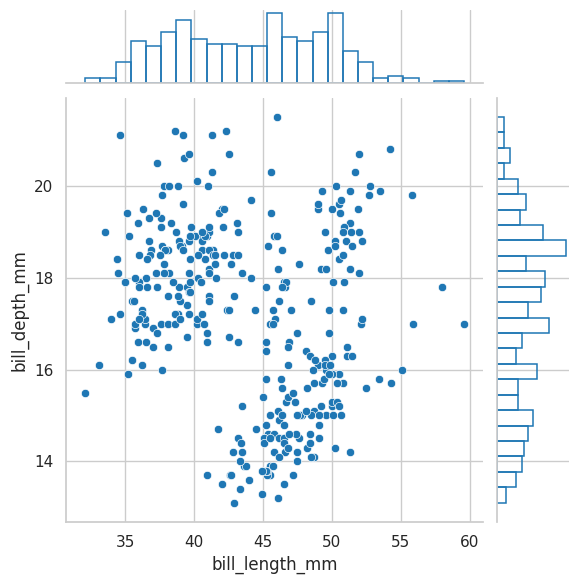

In [76]:
# Combinar multiples graficos
sns.jointplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    marginal_kws=dict(bins=25, fill=False),
);

Cambio de color de los puntos. Ayuda a visualizar las zonas donde se concentra la mayor cantidad de datos

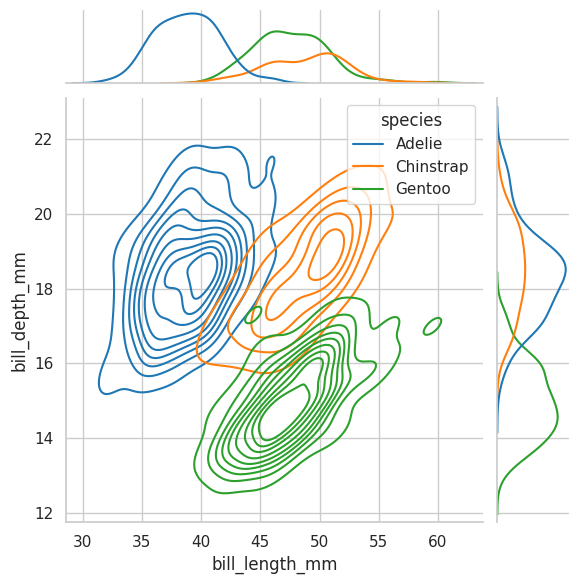

In [149]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    hue='species'
);

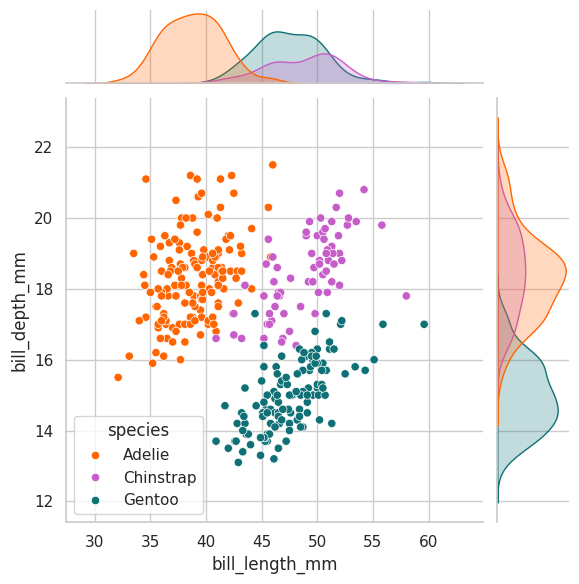

In [77]:
sns.jointplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    palette=penguin_colors,
    hue="species",
);

# Estableciendo relaciones: Gráficos de violín y boxplots

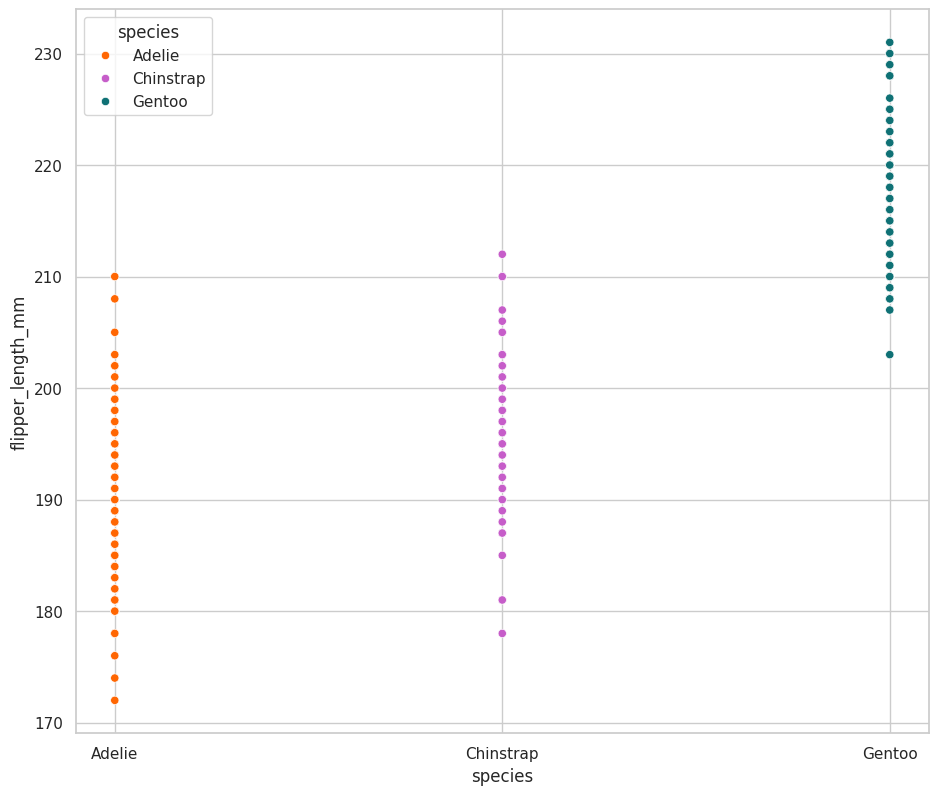

In [78]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_colors
);

Por cada especie tenemos una línea dada su variable numérica, por observar el gráfico podemos concluir que los Gentoo tienen alas más grandes que las otras dos especies, mientras los Chinstrap y los Adelie se encuentran por debajo, ya comparando los Chinstrap con los Adelie podemos ver que su distribución está un poquito más por encima que los Adelie.

Visualizar los puntos es una herramienta muy útil para tener idea de que sucede en nuestros datos.

Otra forma de visualizar es dándole un **ruido aleatorio** a los puntos, ya que nos ayudara a identificar si la cantidad de puntos que se superponen es mayor o menor por especie:

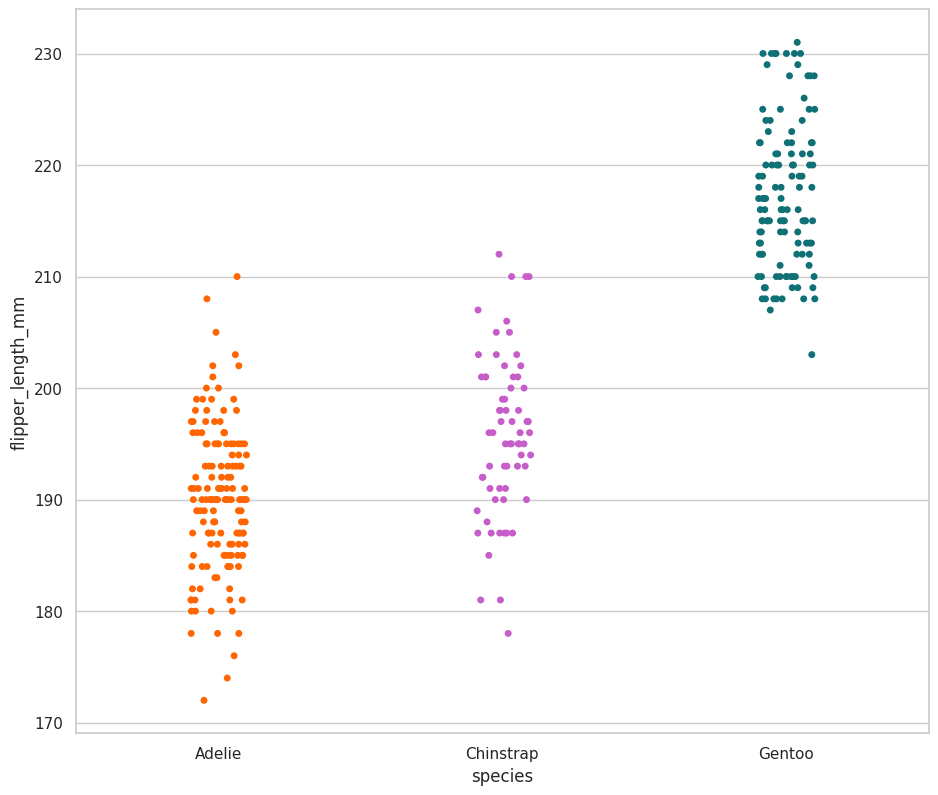

In [79]:
# Agrega ruido a los puntos para obtener una mejor visualizacion de como se distribuyen los datos
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_colors
);

Con este nuevo gráfico podemos tener una mejor visualización de en donde se nos están concentrando los puntos, por ejemplo los Adelie en el eje de las Y de los 190 tenemos una concentración de datos.

De esta forma vemos los estadísticos generales de nuestros pingüinos y podemos detectar un **Outliner** para los Adelie.

Un problema que tenemos con los Boxplots es que no nos deja ver como se encontraban distribuidos nuestros datos, así que para poder mejorar nuestra visualización añadiremos un **stripplot** al gráfico del boxplot

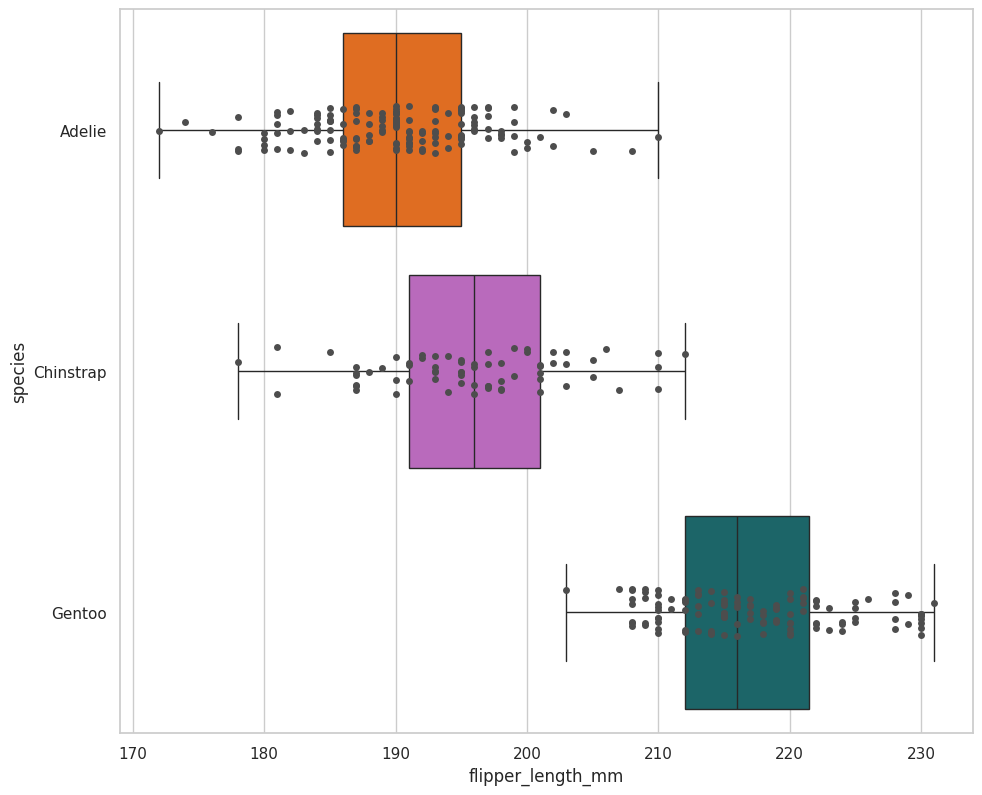

In [80]:
# Grafico de boxplots mas grafico de puntos en un mismo grafico
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue='species',
    palette=penguin_colors,
    whis=np.inf
);

# Grafico de puntos en un mismo grafico
ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
);

De esta forma logramos ver nuestro boxplot y a misma vez como se distribuyen nuestros puntos, teniendo una idea de cuantos puntos están cayendo en cierta zona.

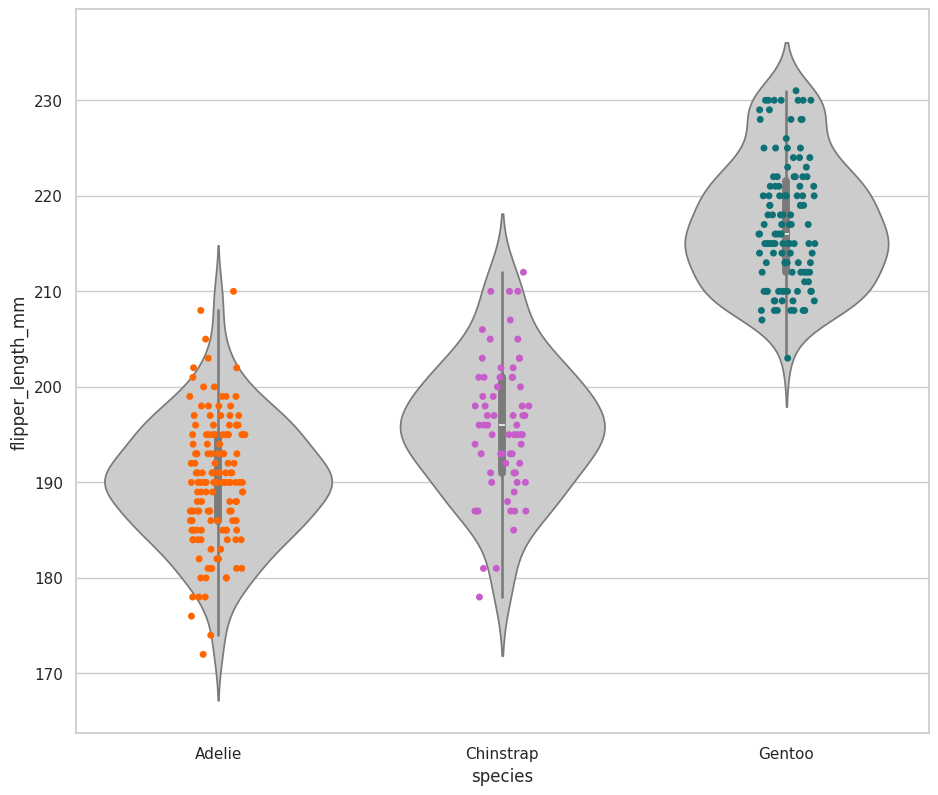

In [81]:
# Grafico de violin mas grafico de puntos en una misma grafica
ax = sns.violinplot(
    data=processed_penguins_df,
    x="species",
    y='flipper_length_mm',
    color='.8'
);

ax = sns.stripplot(
    data=processed_penguins_df,
    x="species",
    y='flipper_length_mm',
    hue='species',
    palette=penguin_colors
);

Teniendo la idea de como se encuentran nuestros datos distribuidos y a su vez la densidad, podemos comenzar a generar conclusiones como:

Si tomamos a nuestros pingüinos Adelie, tendrían una distribución normal, pero si los mezclamos con los otros dos ya no tendrían una distribución normal.

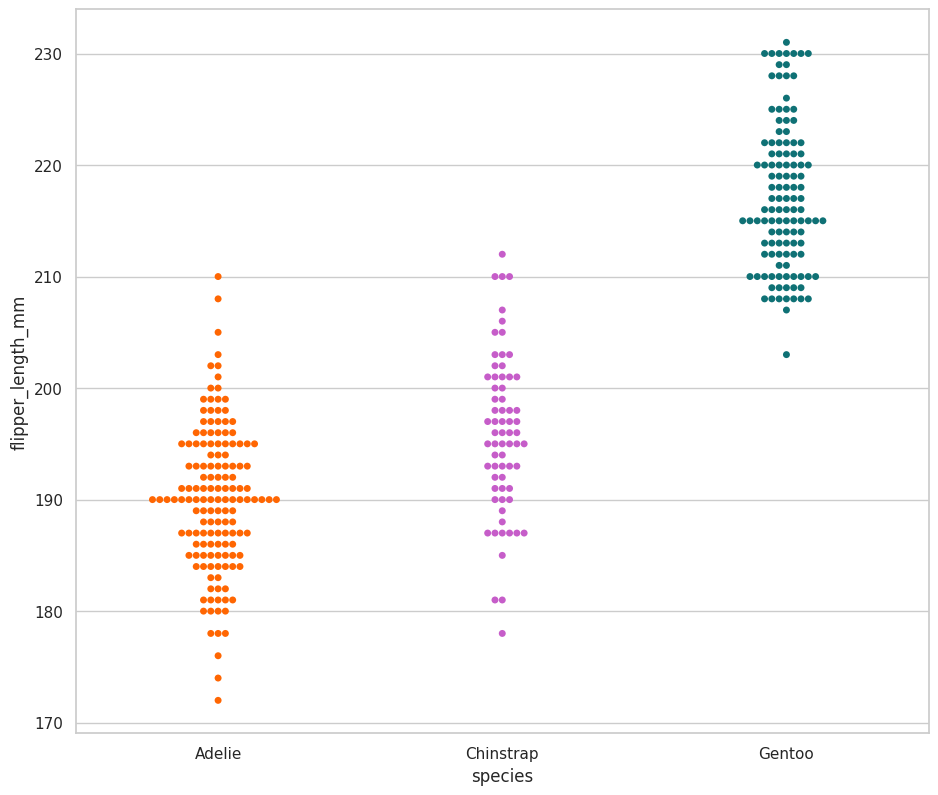

In [82]:
# Grafico de swarmplot. Muestra todos los puntos de los datos
sns.swarmplot(
    data=processed_penguins_df,
    x="species",
    y='flipper_length_mm',
    hue='species',
    palette=penguin_colors
);

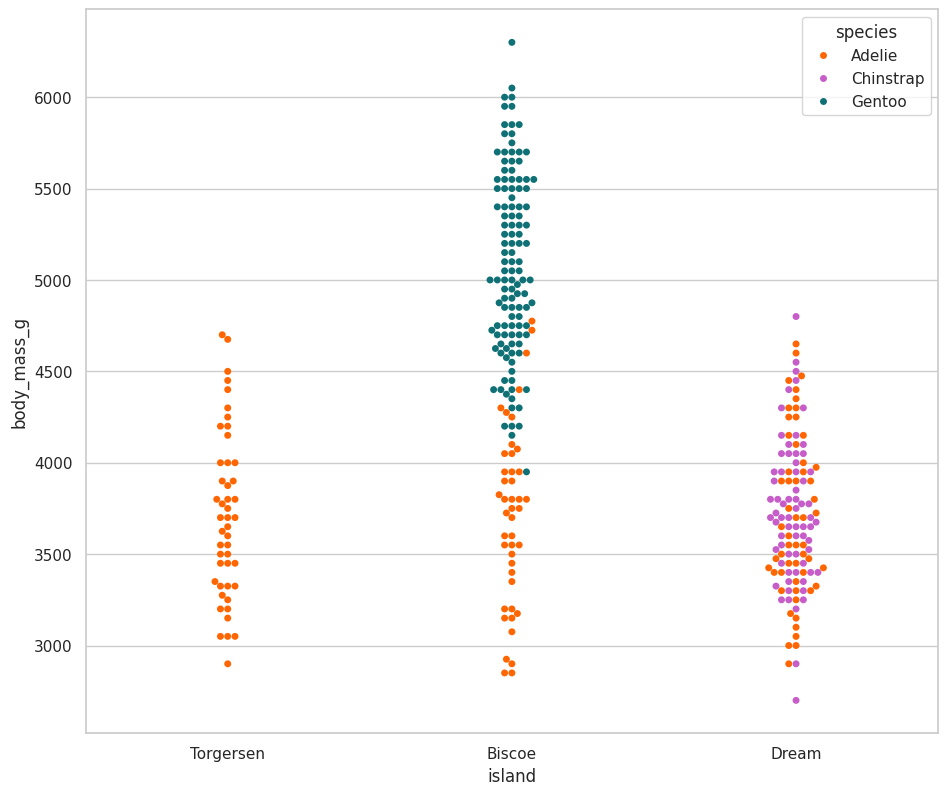

In [83]:
# Isla vs su peso
sns.swarmplot(
    data=processed_penguins_df,
    x="island",
    y='body_mass_g',
    hue='species',
    palette=penguin_colors
);

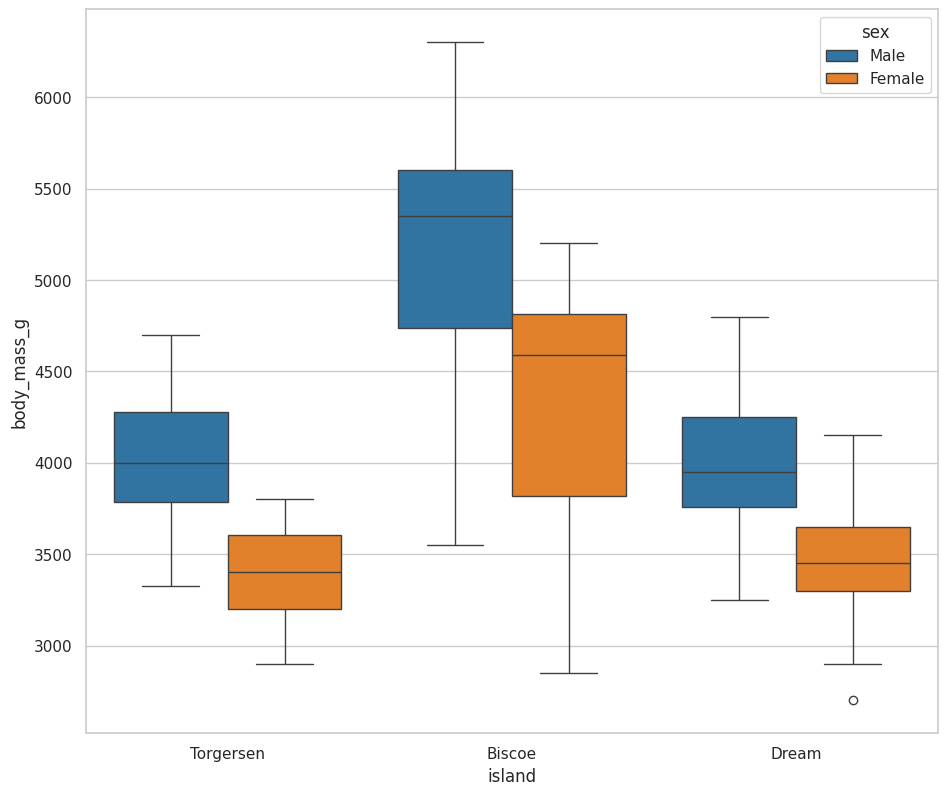

In [84]:
sns.boxplot(
    data=processed_penguins_df,
    x='island',
    y='body_mass_g',
    hue='sex',
);

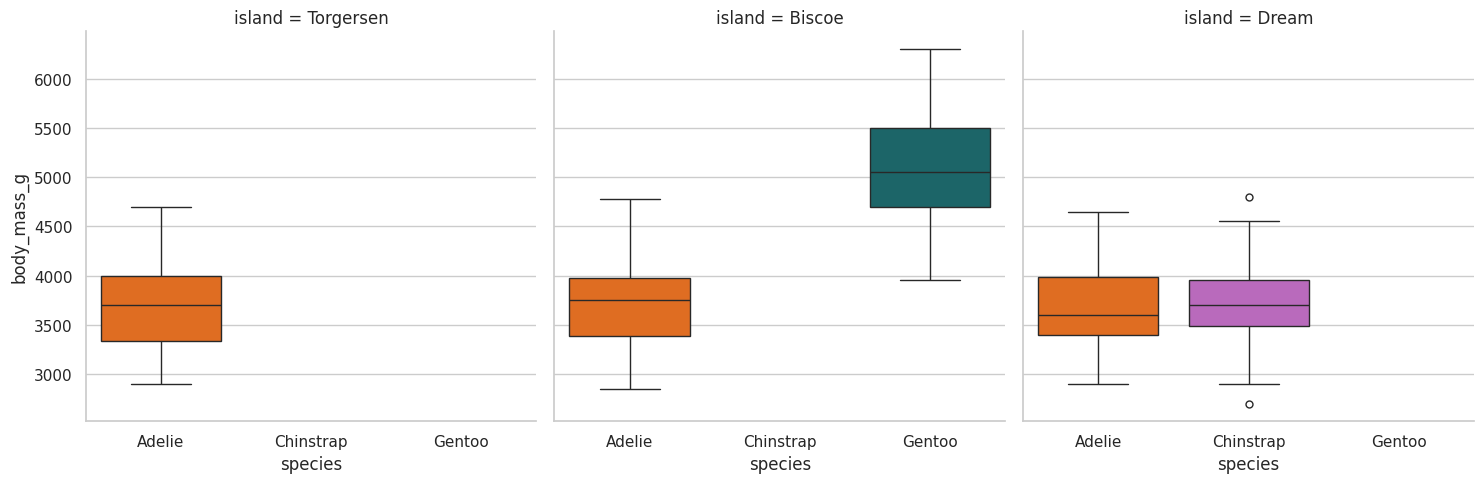

In [85]:
sns.catplot(
    data=processed_penguins_df,
    x="species",
    y='body_mass_g',
    kind="box",
    col='island',
    hue='species',
    palette=penguin_colors
);

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [86]:
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

In [87]:
# Resaltar valores con Pandas
processed_penguins_df.corr(numeric_only=True).style.highlight_between(left=0.65, right=0.99, color='lightgreen')

## ¿Como puedo visualizar los coeficientes de correlación?

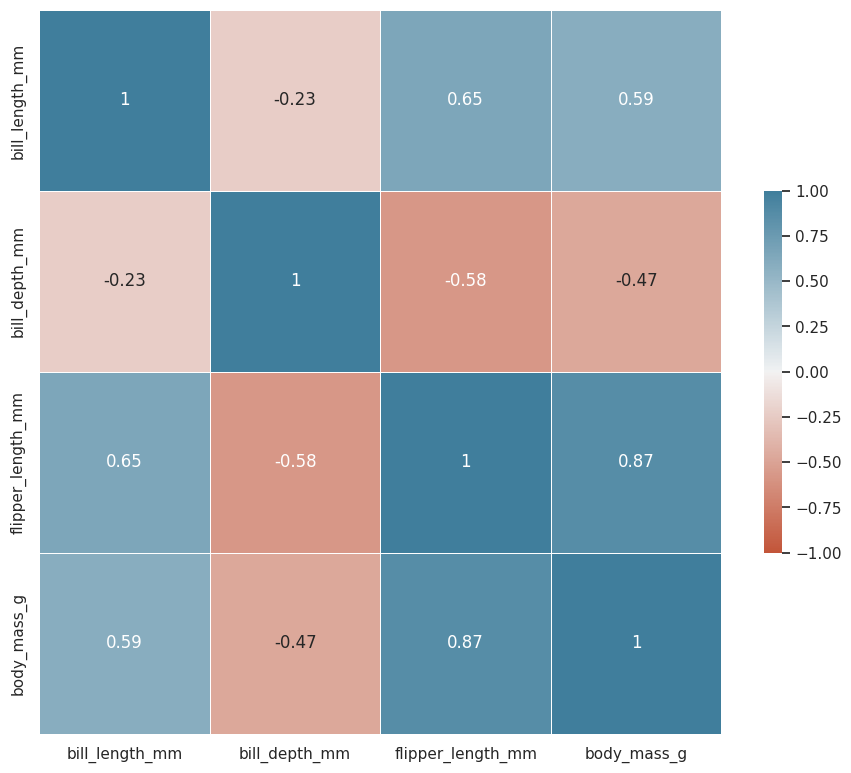

In [88]:
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
);

En caso de existir alguna correlación de tipo lineal, a primera vista, podemos ver que predomina la correlación positiva entre las variables.

- Si vemos la variable del año podemos ver que tiene valores cercanos al 0, por lo que asumimos que esta variable no se encuentra correlacionada linealmente con las otras variables.

- Si vemos la intersección de las variables flipper_length_mm con body_mass_g, podemos ver que su coeficiente de correlación es de 0.87 lo cual nos indica que existe una alta correlación positiva/
De esta manera podemos ir generando información sobre qué variables y cuáles no existe una correlación, si esta es positiva o negativa.

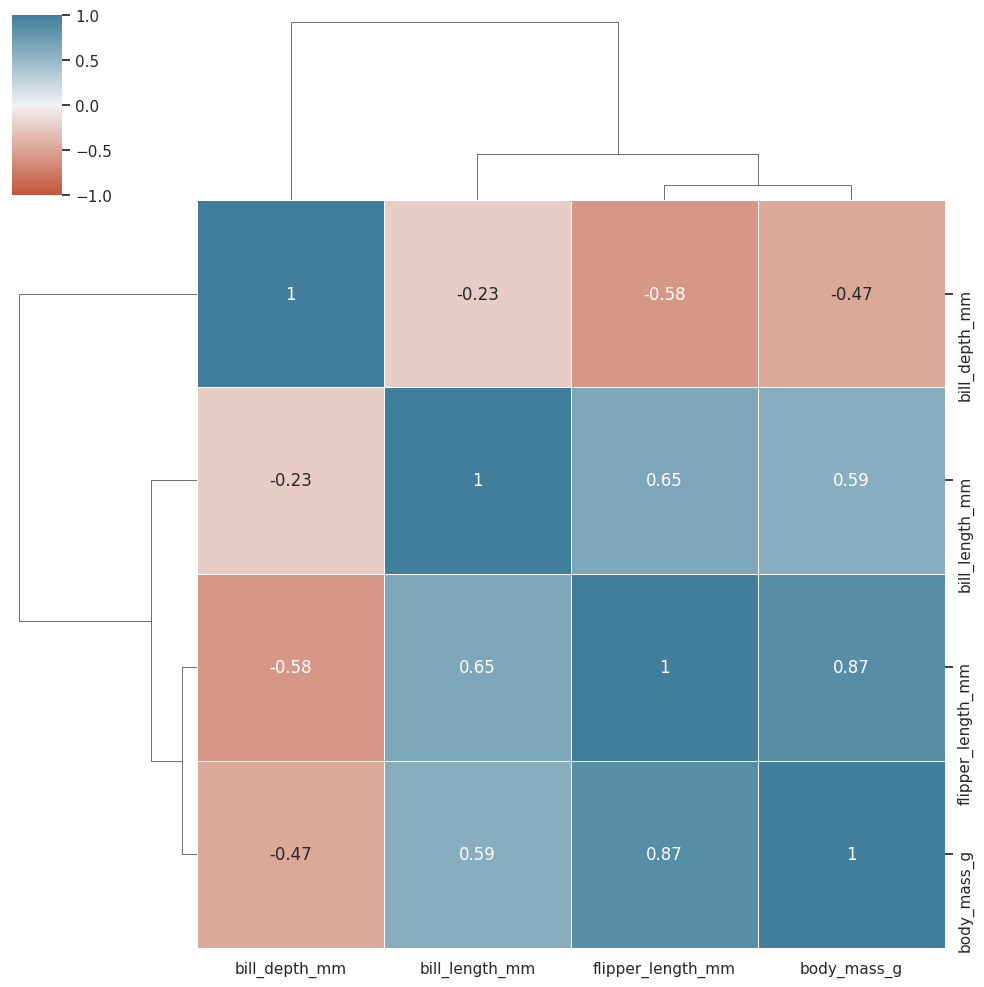

In [89]:
# Agrupar nuestros datos segun los datos positivos, negativos y sus fuerza de correlacion
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
);

Otra opción es graficar con un Clustermap, el cual nos retorna un gráfico parecido al heatmap, pero con los valores ordenados, teniendo una esquina donde se nos concentran nuestras correlaciones positivas.

## ¿Cómo podría representar una variable categórica como numérica discreta?


In [90]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df['sex'].replace(['Female', 'Male'], [0, 1])
    )
)
processed_penguins_df

# Otra forma de hacerlo
# processed_penguins_df['numeric_sex']= processed_penguins_df['sex'].map({'female':0, 'male':1})

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  numeric_sex  
0         3750.0    Male            1  
1         3800.0  Female            0  
2         3250.0  Female            0  
4         3450.0  Female            0  
5         3650.0    Male            1  
..           ...     ...          ...  
338       4925.0  Female            0  
340       4850.0  Female            0  
341       5750.0    Male            1  
342       5200.0  Female            0  
343       5400.0    Male            1  

[333 rows x 8 columns]

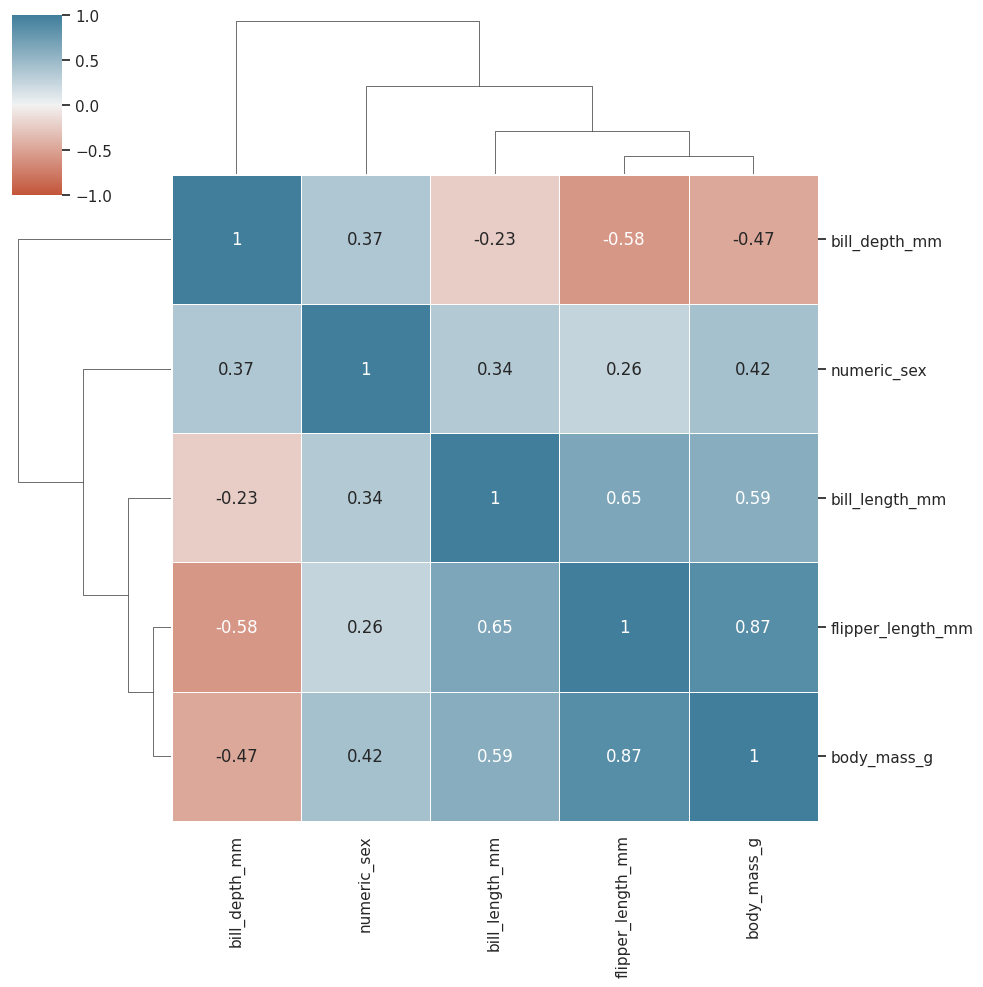

In [91]:
# Agrupar nuestros datos segun los datos positivos, negativos y sus fuerza de correlacion
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
);

# ¿Cuál es una límitante de los coeficientes de correlación lineal?

### Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[1.        , 0.00269802],
       [0.00269802, 1.        ]])

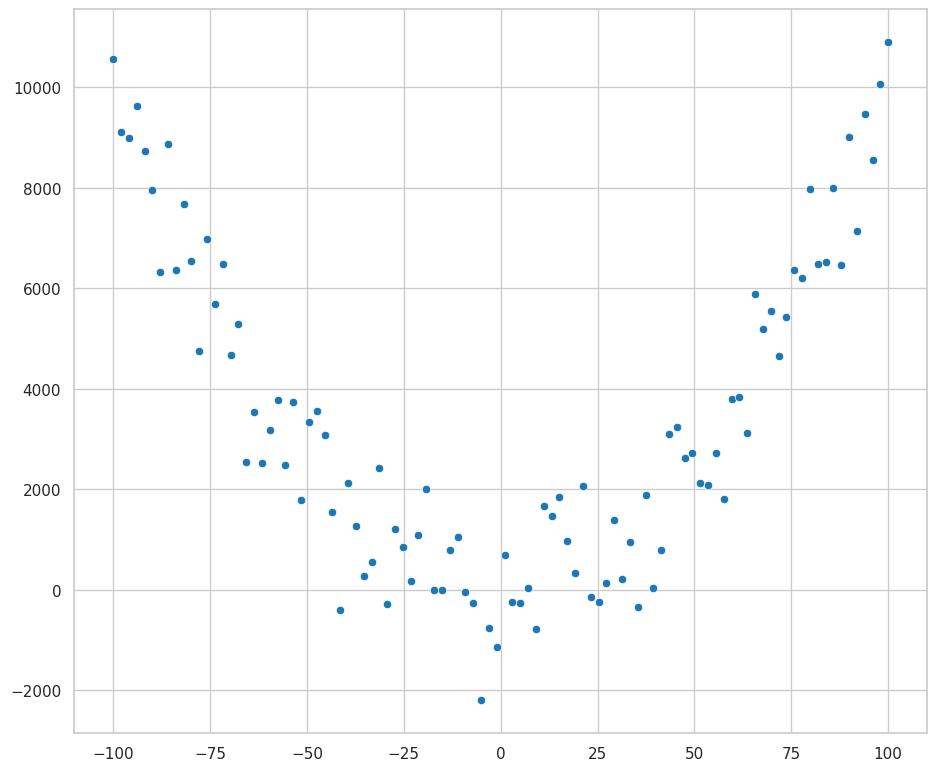

In [92]:
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

# Visualizacion
sns.scatterplot(
    x=x, y=y
);

# Obtener el coeficiente de correlacion lineal sin datafram
np.corrcoef(x, y)

array([[1.        , 0.91665357],
       [0.91665357, 1.        ]])

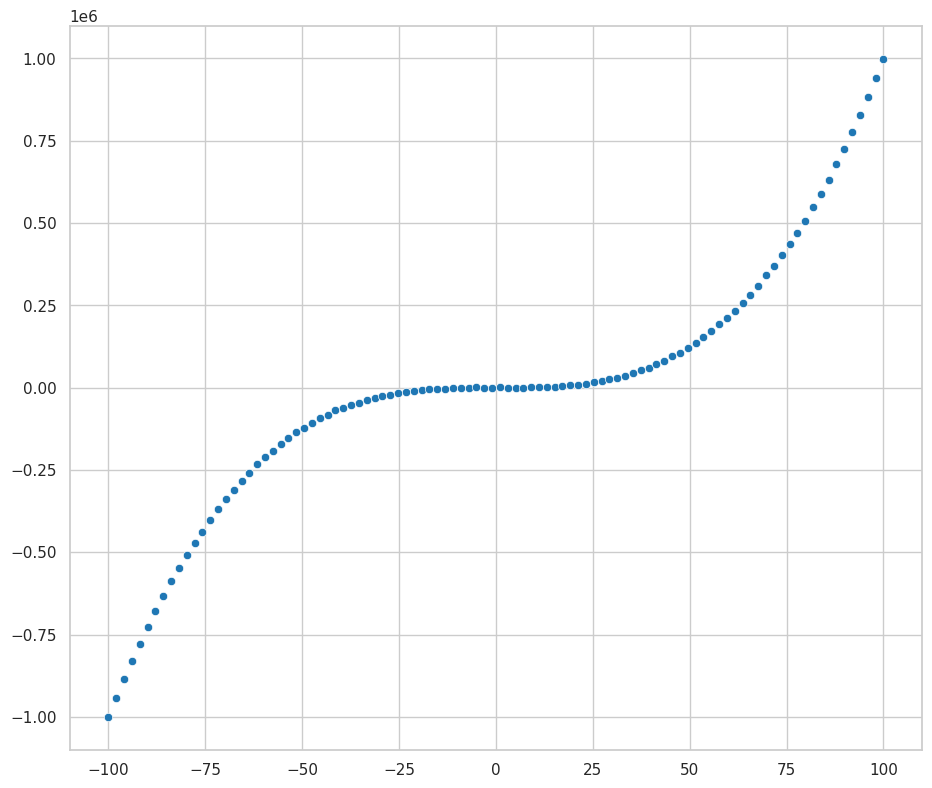

In [93]:
x = np.linspace(-100, 100, 100)
y = x ** 3
y += np.random.normal(0, 1000, x.size)

# Visualizacion
sns.scatterplot(
    x=x, y=y
);

# Obtener el coeficiente de correlacion lineal sin datafram
np.corrcoef(x, y)

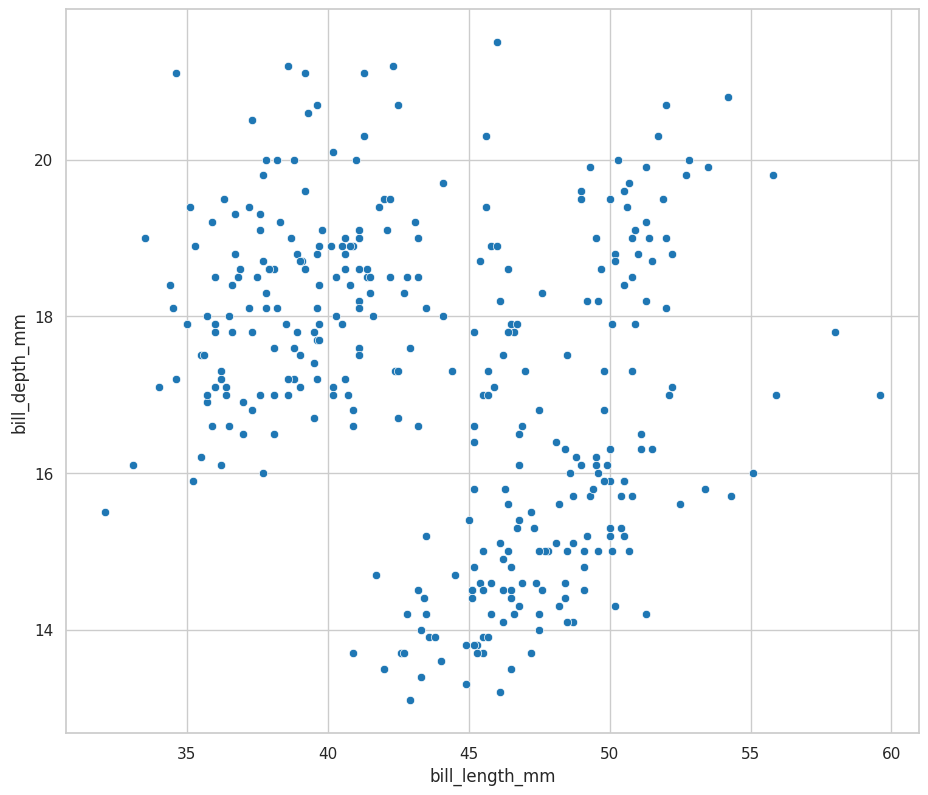

In [94]:
sns.scatterplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm"
);

A primera vista las variables aparentan tener una correlación nula, pero es porque se están calculando las tres especies de pingüinos como si fueran una misma, Si lo separamos por especie podremos visualizar mejor su correlación:

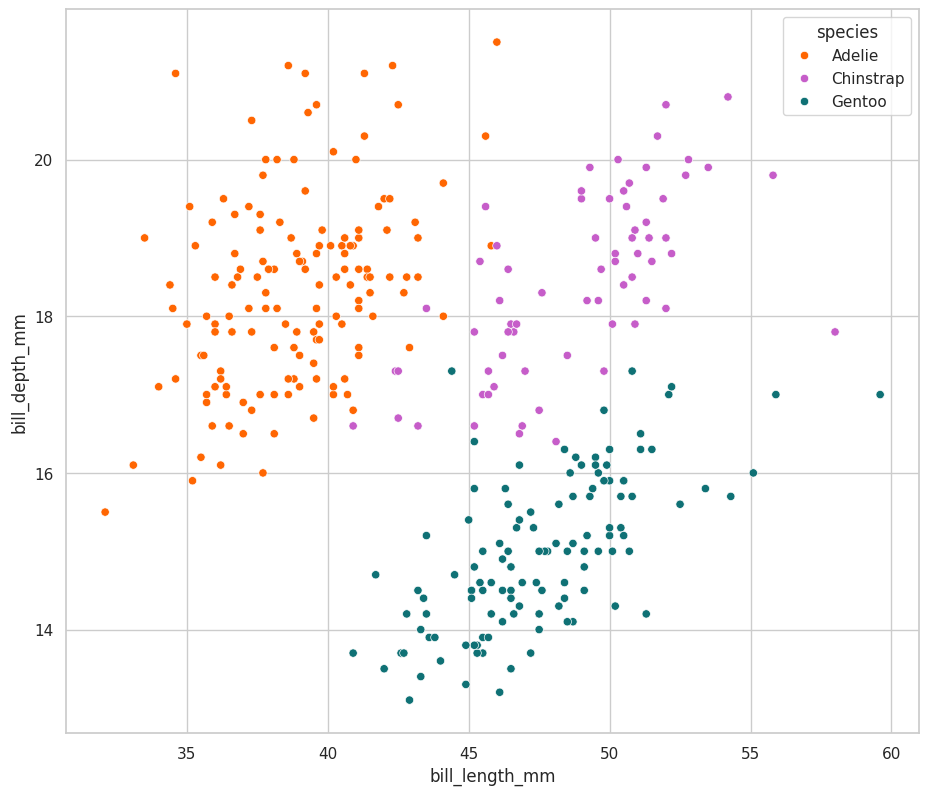

species
Adelie       0.385813
Chinstrap    0.653536
Gentoo       0.654023
Name: bill_depth_mm, dtype: float64

In [151]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_colors,
)
plt.show()
processed_penguins_df.groupby('species').bill_depth_mm.corr(processed_penguins_df.bill_length_mm)

De esta forma podemos observar mejor la correlación que existe entre el largo y ancho del pico de los pingüinos separados por cada especie

Hay que tener cuidado con casos como estos, porque no analizar bien nuestra matriz de correlación puede generar este tipo de limitantes, donde no vemos el panorama de los datos

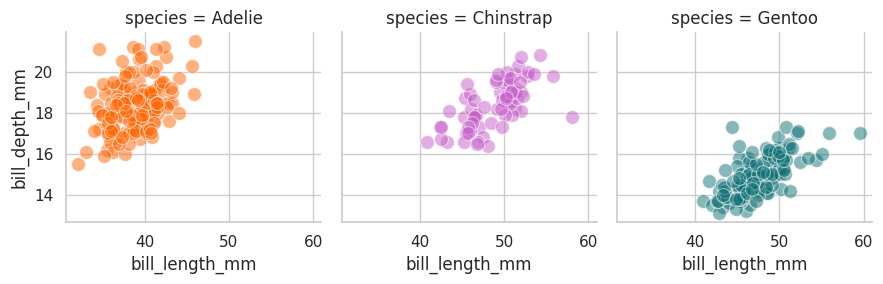

In [95]:
sns.FacetGrid(
    processed_penguins_df,
    col="species",
    hue="species",
    palette=penguin_colors
).map(sns.scatterplot, "bill_length_mm", "bill_depth_mm", alpha=1/2, s=100);

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


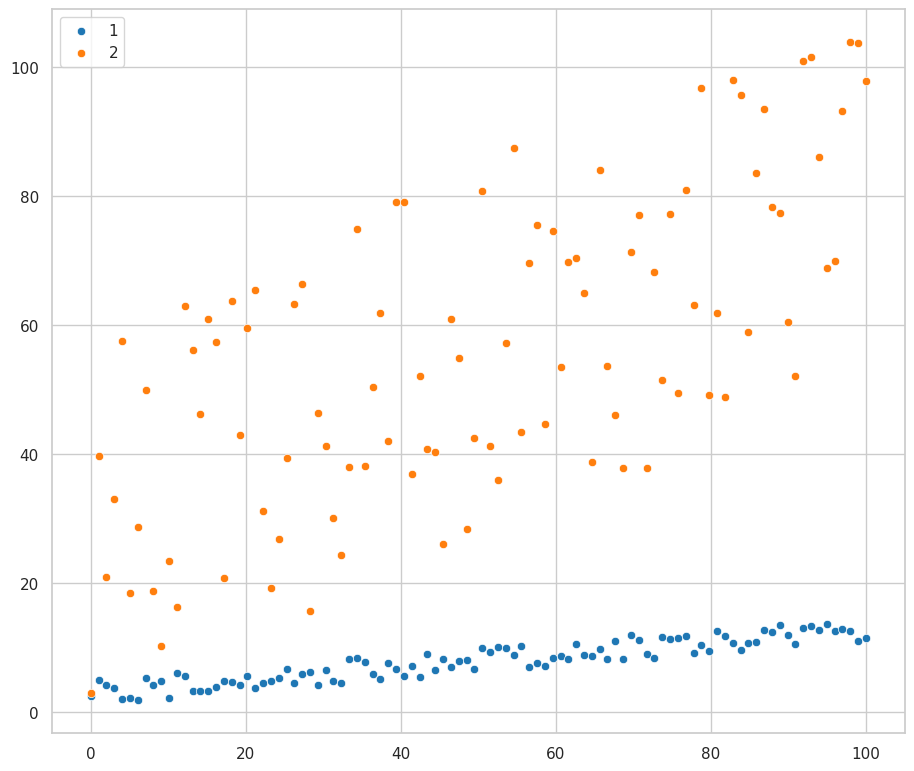

In [96]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

# Estableciendo relaciones: Análisis de regresión simple

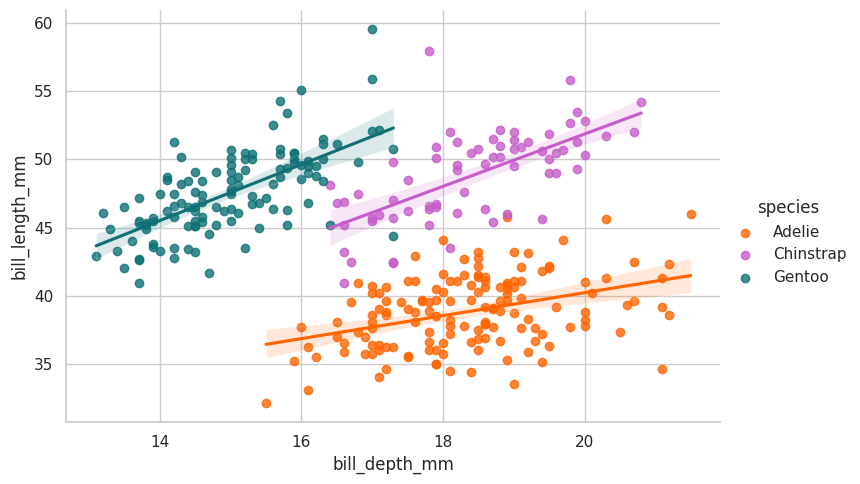

In [153]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm',
    hue='species',
    palette=penguin_colors,
    aspect=1.5
);

In [97]:
# Analisis de regresion
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


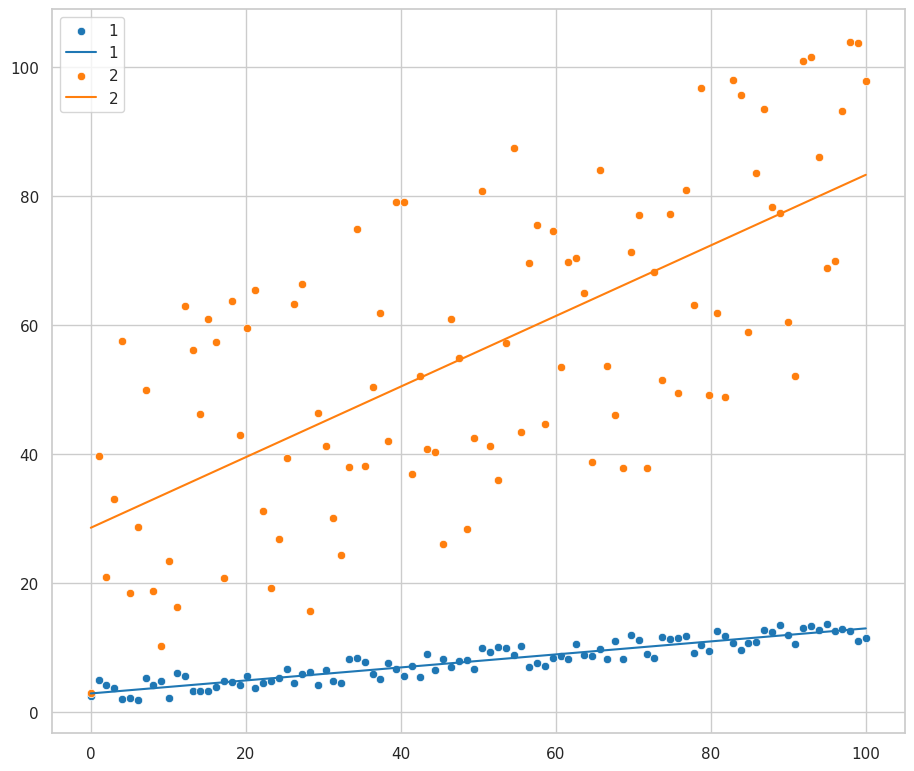

In [98]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])
plt.show()

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


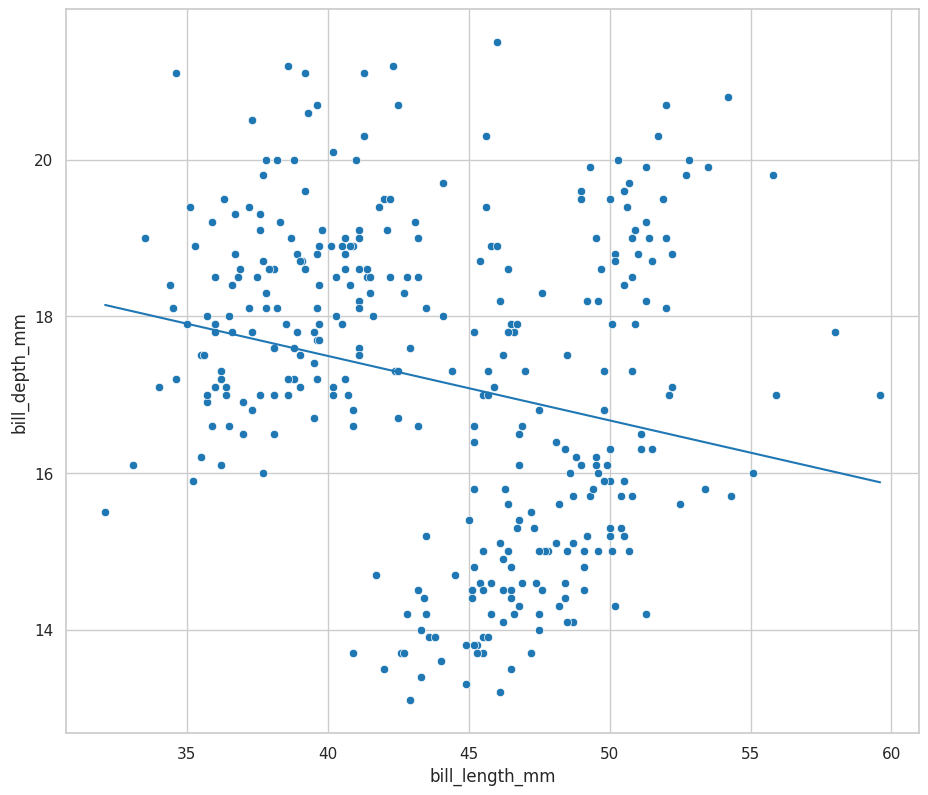

In [99]:
# Grafica de la longitud en funcion del ancho del pico
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

# Calculo de la regresion lineal
res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1

plt.plot(fx_1, fy_1)
plt.show()

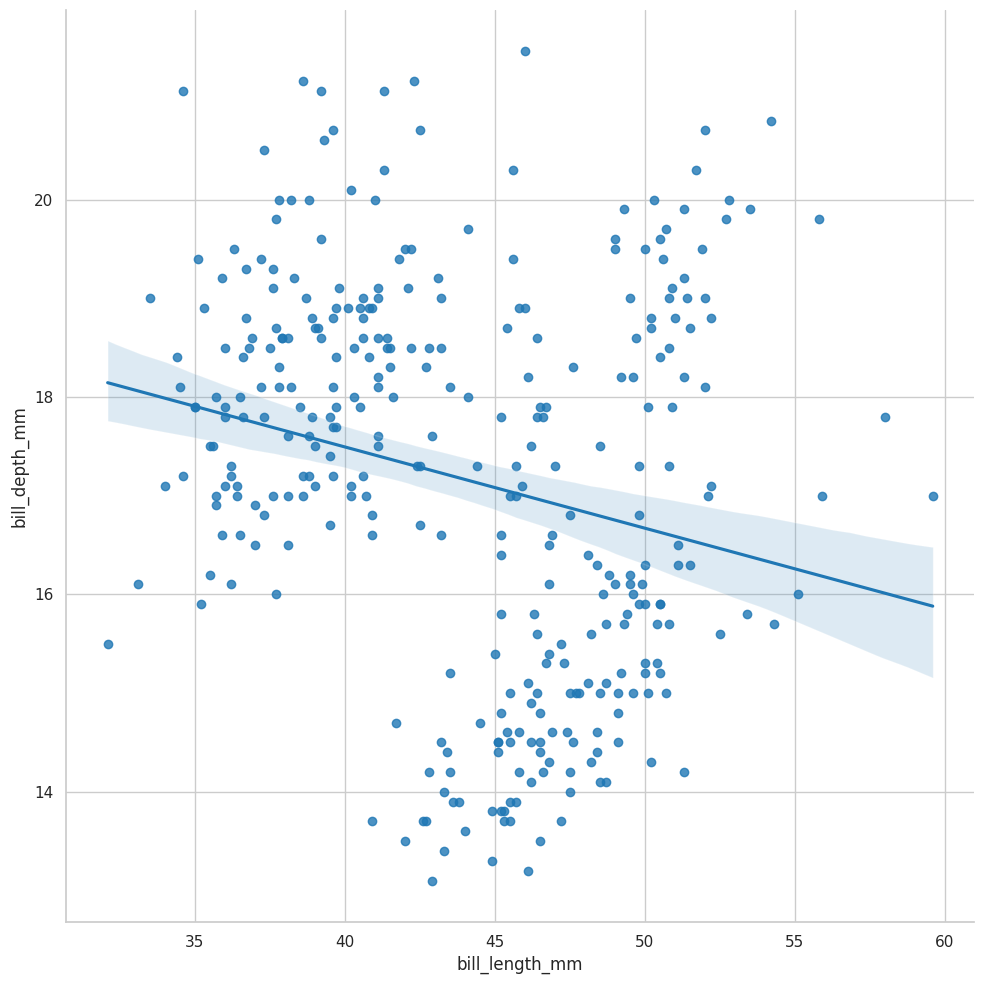

In [100]:
sns.lmplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    height=10
);

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica


In [101]:
x = processed_penguins_df['bill_length_mm']
y = processed_penguins_df['bill_depth_mm']

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')


LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)
LinregressResult(slope=-0.6349051704195029, intercept=54.89085424504756, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.14859778216623312, intercept_stderr=2.567341513538256)


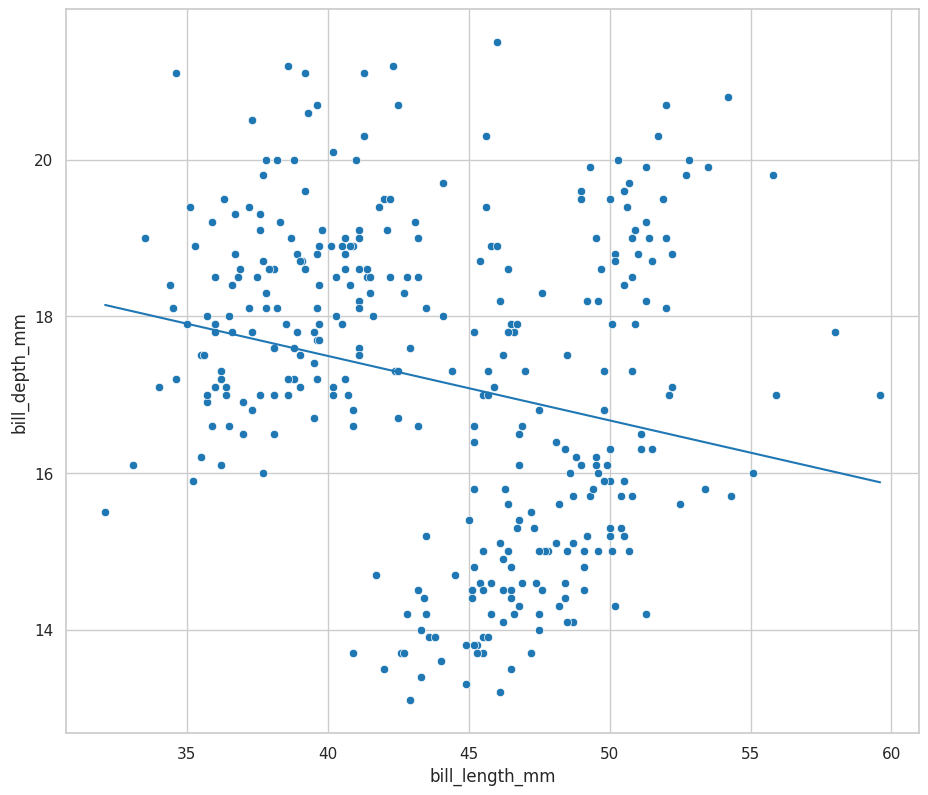

In [102]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)
plt.show()

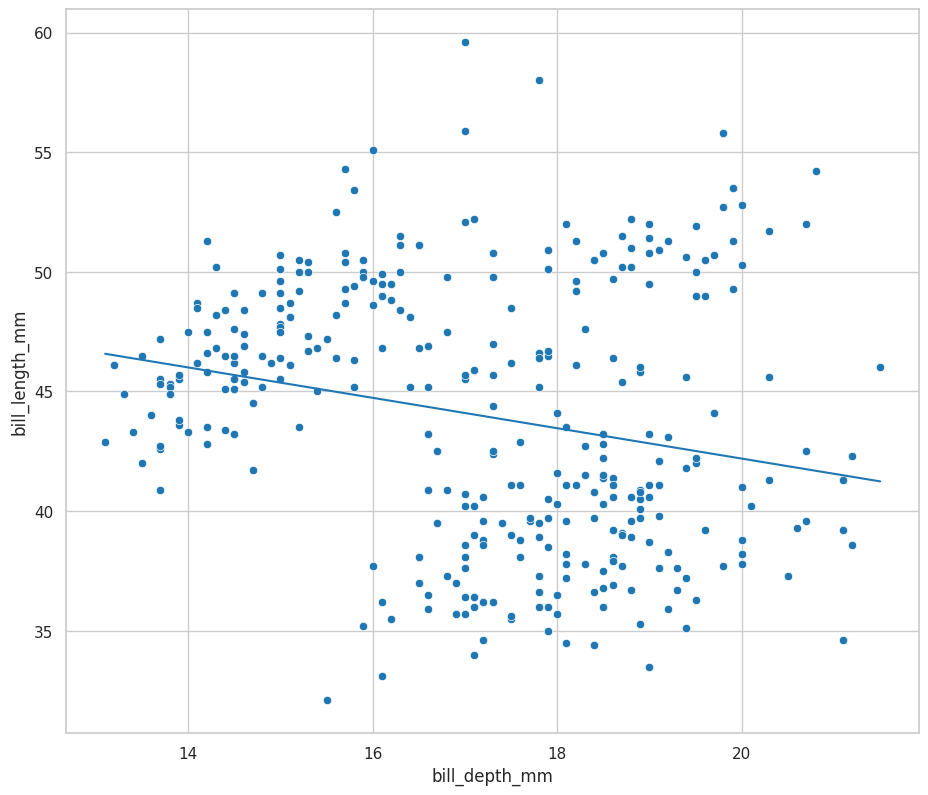

In [103]:
sns.scatterplot(
    x=y,
    y=x
)

fx_1 = np.array([y.min(), y.max()])
fy_1 =  res_y_x.intercept + res_y_x.slope *  fx_1

plt.plot(fx_1, fy_1)
plt.show()

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables

In [104]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [105]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.53e-05
Time:                        10:05:06   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Análisis de regresión múltiple


Para realizar este ejercicio, imaginaremos un escenario hipotético, donde somos científicos y nos encontrábamos en la Antártida haciendo mediciones sobre los pingüinos, donde mediamos la longitud y grosor de sus alas, sus picos, si son machos o hembras y su peso. Pero resulta que te olvidaste tu balanza donde pesabas a los pingüinos, entonces tomaste todas las otras medidas, pero te falto registrar cuanto pesaba cada pingüino, por lo tanto, se te planteo este problema:

**Olvidaste tu báscula para pesar a los pingüinos.¿Cuál sería la mejor forma de capturar ese dato?**

¿Te preguntaste si existía alguna manera de poder asociar las medidas que tenías y lograr **inferir** cuanto pesaba cada pingüino?

## Creando modelos

In [117]:
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
numeric_sex              0.344078       0.372673           0.255169   

                   body_mass_g  numeric_sex  
bill_length_mm        0.589451     0.344078  
bill_depth_mm        -0.472016     0.372673  
flipper_length_mm     0.872979     0.255169  
body_mass_g           1.000000     0.424987  
numeric_sex           0.424987     1.000000

### Modelo 1

In [118]:
# Definimos el modelo y lo ajustamos

model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.54e-32
Time:                        10:31:31   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De la variable independiente bill_length_mm vemos que la pendiente es de 87.41 lo que indica que por cada cambio en milímetro de longitud del pico (bill_length_mm) se genera un cambio de 86 gramos en el peso.

### Modelo 2

Peso del pingüino vs longitud del pico, ancho del pico

In [119]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           7.04e-46
Time:                        10:31:40   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Agregando una nueva variable podemos ver como cambio el valor de bill_depth_mm, donde vemos que ahora la pendiente de la variable bill_length_mm es 75.28 que se traduce como un cambio de 75 gramos por cada unidad de milímetro, luego vemos la variable bill_depth_mm que por cada cambio milimetro que crezca se esperara que el pingüino pese 142 gramos menos.

### Modelo 3

Peso de los pingüinos vs longitud del pico, ancho del pico, longitud de las alas

In [120]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          9.26e-103
Time:                        10:31:45   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El valor que relaciona el peso con la longitud del pico vuelve a cambiar, siendo cada vez más pequeño. El valor que relaciona el peso con el ancho se vuelve pequeño y positivo. El valor de relación entre las alas y el peso es de 50.26 teniendo mayor relevancia.

Debemos tener en cuenta el R^2 (R-Squared) de cada modelo, ya que es un indicador de la variabilidad obtenida por las variables contrastadas. A mayor R cuadrado, se captura mejor el comportamiento de las variables.

En el primer modelo es muy bajo (0.35). En el tercer modelo es de 0.75, lo que indica que captura mejor la variabilidad de los datos

### Modelo 4

In [121]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          6.28e-122
Time:                        10:31:54   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo 5

Un modelo mientras más sencillo mejor. Se debe contrastar aquellas variables que estén más relacionadas con la variable objetivo; Esto ayuda a disminuir el error de los modelos y mejorar su efectividad de predicción. Peso del pingüino vs longitud de las alas, sexo, especie

In [122]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          3.53e-118
Time:                        10:31:58   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.Male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Efectivamente, la relación entre las alas, el sexo y la especie con el peso del pingüino capturan mejor el comportamiento de los datos (Adj.R^2:0.865)

Si has prestado atención a las Notas, abras visto este mensaje antes:

[2] The condition number is large, 2,95e+03. This might indicate that there are\ strong multicollinearity or other numerical problems.


Generalmente, esto indica que existe una multicolinealidad por lo cual presenta una fuerte correlación entre la variable a independiente y dependientes.

¿Recuerdas que nuestras variables body_mass_g y flipper_length_mm tenían una alta correlación?

Este es el motivo por el que surge este mensaje.

In [123]:
processed_penguins_df.corr(numeric_only=True).style.highlight_between(left=.8,right=.99, color='lightgreen')

Aunque haya casos que este warning nos indique una multicolinealidad, no siempre se deberá a esta situación, ya que puede surgir un problema cuando usamos una variable para predecir otra que se encuentra altamente relacionada con una segunda variable del conjunto de datos, por lo que podemos observar que cuando una variable se modifica nuestra variable objetivo de forma positiva, con la otra variable podría ocurrir lo contrario y cuando estas se combinan las predicciones dejarían de ser precisas.

Por esto es necesario antes de definir un modelo entender que tan relacionadas están las variables que buscan explicar el fenómeno

## Visualización del análisis de regresión múltiple

### Creación de tabla de resultados

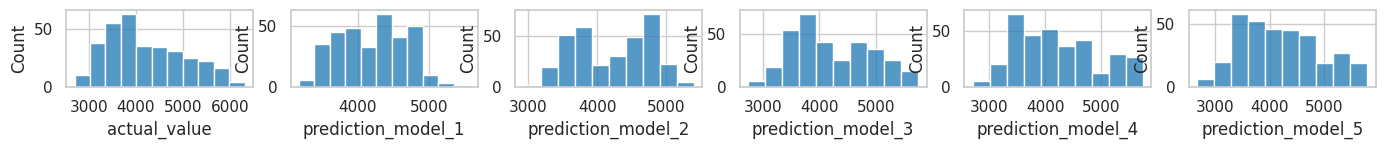

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
338        4925.0         4485.416214         4951.159375         4817.401804   
340        4850.0         4450.699510         4833.930015         4877.548625   
341        5750.0         4763.149845         4899.545411         5269.708799   
342        5200.0         4311.832695         4641.476223         4728.911846   
343        5400.0         4719.753965         4803.936225         4818.337739   

     prediction_model_4  prediction_model_5 species     sex  
0           3579.136946         3441.323750  Adelie    Male  
1           3343.220772         3328.384372  Adelie  Female  
2           3639.137335         3751.223949  Adelie  Female  
4           3457.954243         3657.259599  Adelie  Female  
5           3764.536023         3864.163327  Adelie    Male  
..                  ...                 ...     ...     ...  
338         4730.939522         4643.885279  Gentoo  Female  
340         4719.043886         4690.867454  Gentoo  Female  
341         5402.946434         5367.592935  Gentoo    Male  
342         4563.248182         4549.920929  Gentoo  Female  
343         5020.243038         4944.753358  Gentoo    Male  

[333 rows x 8 columns]

In [125]:
models_results = pd.DataFrame(
    dict(
        actual_value = processed_penguins_df['body_mass_g'],
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species = processed_penguins_df['species'],
        sex = processed_penguins_df['sex']
    )
)


fig,ax = plt.subplots(1,6,figsize=(16.9,1))
for i, col in enumerate(models_results.iloc[:,:6].columns):
    sns.histplot(
        ax=ax[i], 
        x=models_results[col], 
        )

plt.show()
models_results

En la distribución de actual_value vemos que aparenta un sesgo positivo, a simple vista la distribución que más se asemeja es la del modelo 5, ya que los otros modelos aparentan generar una distribución bimodal

### ECDFs

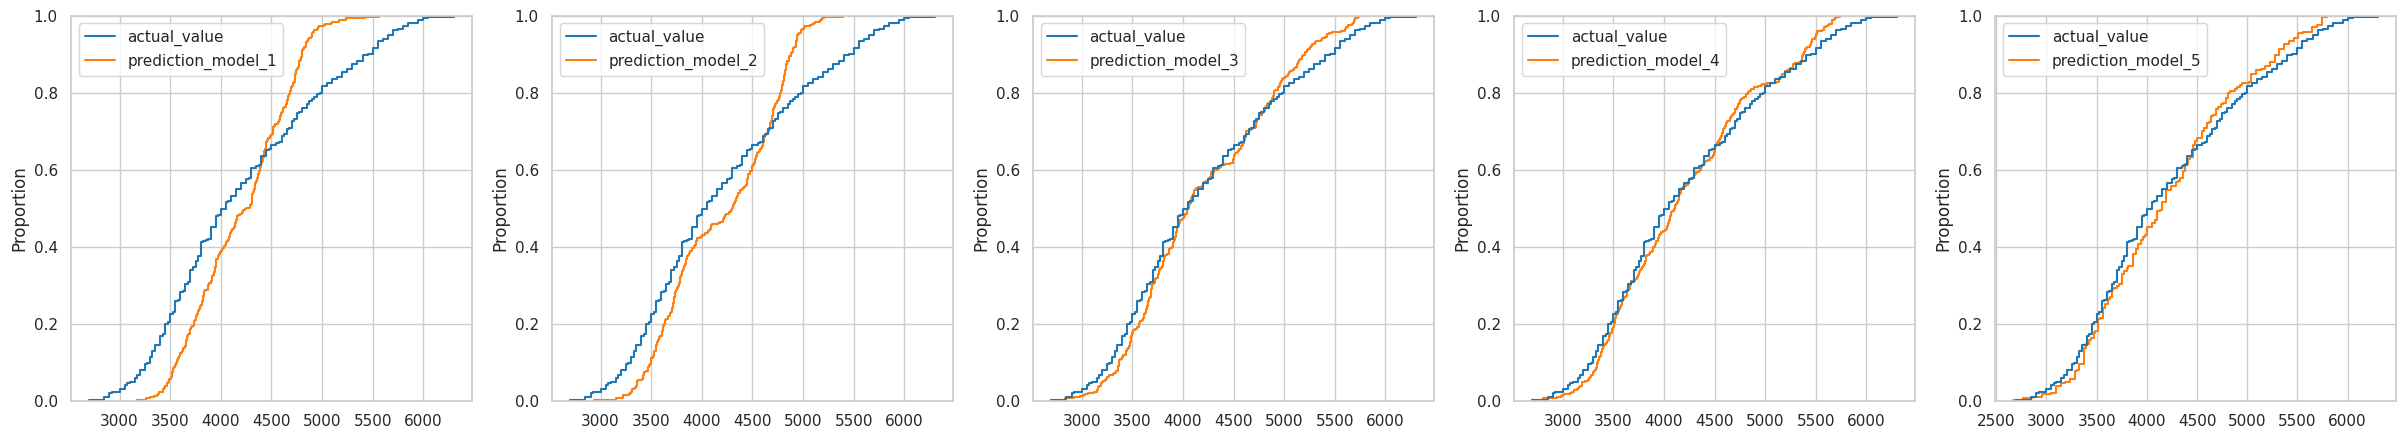

In [128]:
fig,ax = plt.subplots(1,5,figsize=(30,5))
for i, col in enumerate(models_results.iloc[:,1:6].columns):
    sns.ecdfplot(
        ax=ax[i],
        data=models_results.select_columns('actual_value',col),
    )

Vemos que comparando el valor real con los modelos, los primeros 2 modelos son aquellos que tuvieron el peor resultado, mientras que el modelo 3 se fue ajustando a los valores reales, y por último el 4 y 5 vemos que son los modelos que mejor se ajustan.

Un detalle que sobresalta de los modelos 4 y 5 es que hay partes donde los modelos predicen los valores un poco por debajo de los datos reales y partes donde es un poco por encima de los resultados

### PDFs

Graficaremos los resultados del modelo 4 y 5 mediante la Función de Densidad de Probabilidad.

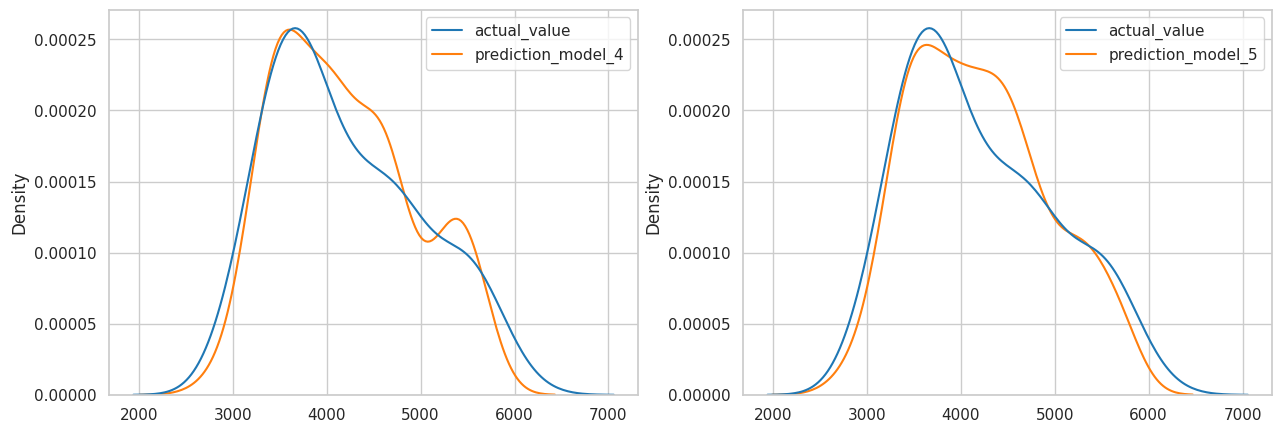

In [130]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
for i, col in enumerate(models_results.iloc[:,4:6].columns):
    sns.kdeplot(
        ax=ax[i],
        data=models_results.select_columns('actual_value',col),
    )

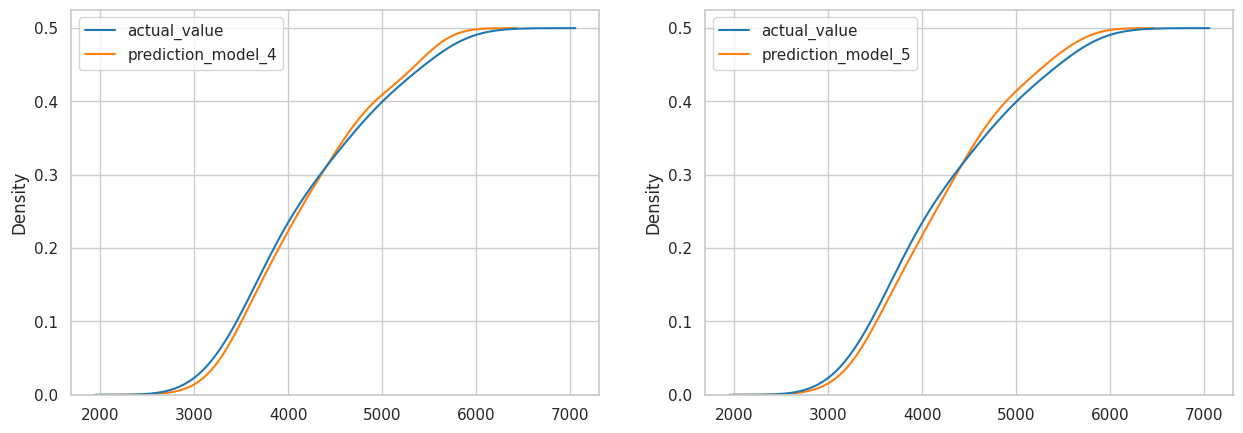

In [131]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
for i, col in enumerate(models_results.iloc[:,4:6].columns):
    sns.kdeplot(
        ax=ax[i],
        data=models_results.select_columns('actual_value',col),
        cumulative=True
    )

### ¿Que pudimos haber encontrado antes de hacer los modelos?

Pudimos haber encontrado las mismas conclusiones del modelo 5 si en el Análisis Exploratorio hubiéramos experimentado con un gráfico entre la longitud de las aletas y el peso de los pingüinos utilizando el sexo como variable categórica. El análisis exploratorio de los datos es sumamente importante, ya que nos ayuda a intuir el modelo desde el inicio y de esa manera a ahorrar tiempo

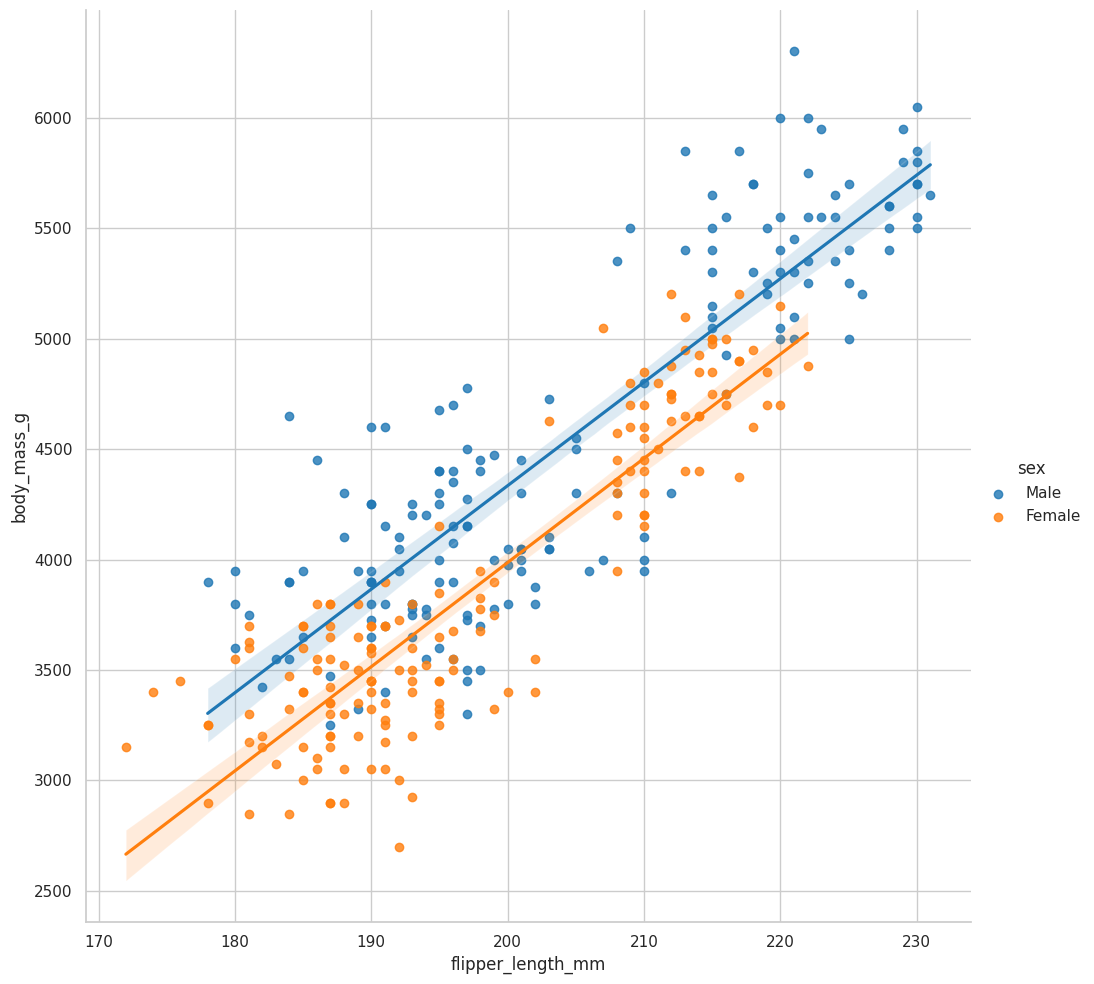

In [133]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
);

## Análisis de regresión logística (variables categóricas)

Te olvidaste tu kit para realizar la extracción de sangre con el que determinábamos si era macho o hembra. Como determinarías el sexo del pingüino?

Como ves, en este caso ya no buscamos una variable numérica, sino que buscamos predecir una variable categórica la cual tiene dos valores posibles ¿Es un macho o una hembra?

Un análisis de regresión logística se puede hacer con múltiples categorías, pero empezaremos con dos variables, ya que es el caso más sencillo donde veremos que variables nos ayudan a predecir el sexo de un pingüino.

**Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?**


Creamos el modelo con las variables que consideremos influyen en la elección de si es un macho o hembra. Nuestra variable objetiva es categórica (sexo), por tanto, debemos convertirla en numérica para poder aplicar al modelo.

In [155]:
# Usaremos la base de datos df2 donde habiamos guardados los valores de numeric_sex

logit_model = smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit()


logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.4793
Time:                        11:15:19   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [156]:
# Restamos los valores de probabilidad entre la isla Dream y la Torgersen
-1.55 - (-1.03)

-0.52

Dado que la variable sexo es categórica la convertimos en 0(hembras) y 1(machos), los resultados de la Regresión Logística viene dado en función de los machos.

Los resultados se interpretan así:

1. A mayor longitud de las aletas, más probable que el pingüino sea macho (0.1393).

2. A mayor longitud de los picos, más probable que el pingüino sea macho (0.1413).

3. Mientras más ancho el pico, más probable que sea macho (1.6401).

4. Es menos probable que haya machos en la isla Dream respecto a la Biscoe (-1.55)

5. Es menos probable que haya machos en la isla Torgensen respecto a la Biscoe (-1.03)

6. Es menos probable que haya machos en la isla Torgensen respecto a la Dream (-0.52)

El parámetro P > abs(Z) indica cuáles son las variables más significativas estadísticamente para el resultado. Mientras más tienda al valor 0 más significativa es.

Cuando tenemos tres variables y en los resultados de la regresión logística solo aparecen dos, indica que los esos valores son respecto a la variable faltante

### Exploración de nuestras variables categóricas

In [157]:
(
    processed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

island     sex  count
0     Biscoe    Male     83
1     Biscoe  Female     80
2      Dream    Male     62
3      Dream  Female     61
4  Torgersen  Female     24
5  Torgersen    Male     23

Vemos que la isla de Biscoe tiene más conteo de macho y hembras que las otras islas, lo cual coincide con nuestro modelo logístico.

El análisis de regresión logística si nos hubiera ayudado a predecir algo, pero es probable que también esos coeficientes que obtuvimos de los datos, representaban que nuestros datos no se encontraban balanceados y nuestro modelo se estaba sesgando

### ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada especie?

El modelo anterior tenía como propósito identificar el sexo de un pingüino, pero ahora nos preguntamos si podríamos crear un modelo donde busquemos predecir si el pingüino es un Adelie, un Chinstrap o un Gentoo

Para este ejercicio puedes elegir el pingüino que más te guste, en mi caso realizaré el ejercicio con el pingüino Adelie porque es muy lindo

In [158]:
processed_penguins_df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [165]:
df_adelie =(
    processed_penguins_df
    .assign(is_adelie = lambda df: df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))
)

In [166]:
df_adelie

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  numeric_sex  is_adelie  
0         3750.0    Male            1          1  
1         3800.0  Female            0          1  
2         3250.0  Female            0          1  
4         3450.0  Female            0          1  
5         3650.0    Male            1          1  
..           ...     ...          ...        ...  
338       4925.0  Female            0          0  
340       4850.0  Female            0          0  
341       5750.0    Male            1          0  
342       5200.0  Female            0          0  
343       5400.0    Male            1          0  

[333 rows x 9 columns]

In [167]:
model_is_adelie = smf.logit(
    data=df_adelie,
    formula='is_adelie ~ flipper_length_mm + C(sex)'
).fit()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


In [168]:
model_is_adelie.params

Intercept            40.568368
C(sex)[T.Male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

Los resultados indicas que:

- Es más probable que un pingüino Adelie sea macho que hembra (1.28).
- Es menos probable que un pingüino Adelie sea de alas largas (-0.209).

Creamos el modelo logístico con las variables que consideramos relevantes para determinar la especie de un pingüino.

In [171]:
is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = df_adelie.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_prediction

actual_adelie  predicted_values
0                1               1.0
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
..             ...               ...
338              0               0.0
340              0               0.0
341              0               0.0
342              0               0.0
343              0               0.0

[333 rows x 2 columns]

Creamos una tabla con los resultados generales de la tabla anterior

In [172]:
(
    is_adelie_df_prediction
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
)

actual_adelie  predicted_values  count
0              0               0.0    151
1              1               1.0    129
2              0               1.0     36
3              1               0.0     17

Visualización de los resultados mediante una matriz de confusión

In [173]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_prediction.actual_adelie,
        is_adelie_df_prediction.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_prediction.actual_adelie,
    is_adelie_df_prediction.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

- Verdadero Negativo (0,0): 151

- Falso Positivo (0,1): 36 (Error Tipo I)

- Falso Negativo (1,0): 17 (Error Tipo II)

- Verdadero Positivo (1,1): 129

## Paradoja de Simpson

Fenómeno en el cual es posible concluir dos cosas totalmente opuestas a partir de los mismos datos, dependiendo el cómo se clasifican estos

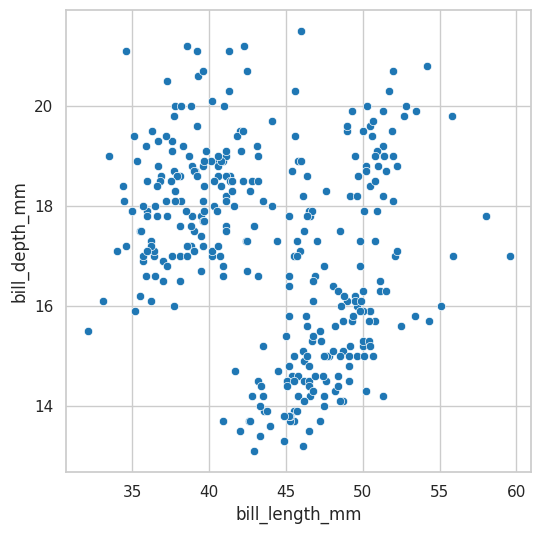

In [174]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
);

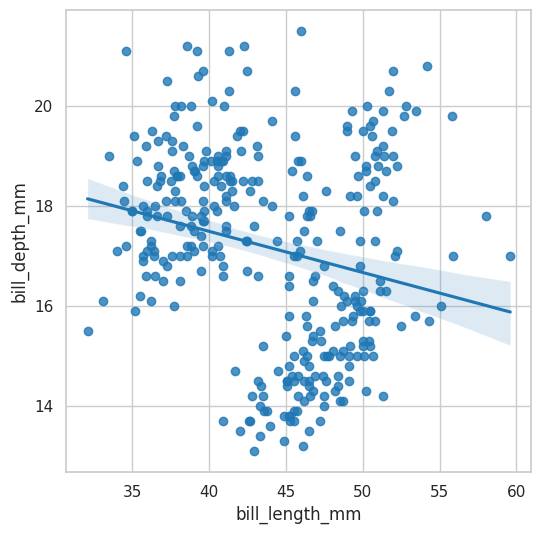

In [186]:
plt.figure(figsize=(6,6))
sns.regplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
);

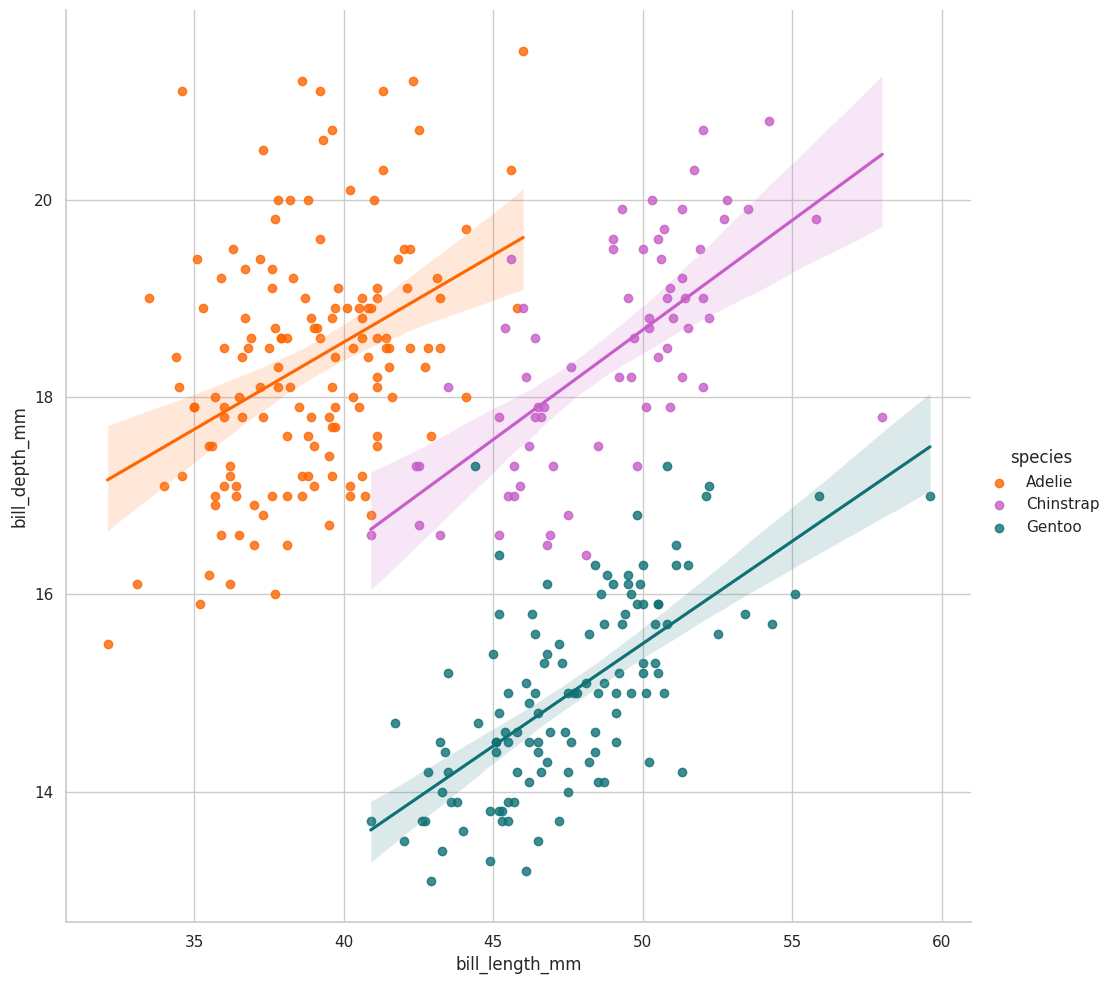

In [187]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y="bill_depth_mm",
    hue='species',
    height=10,
    palette=penguin_colors
);

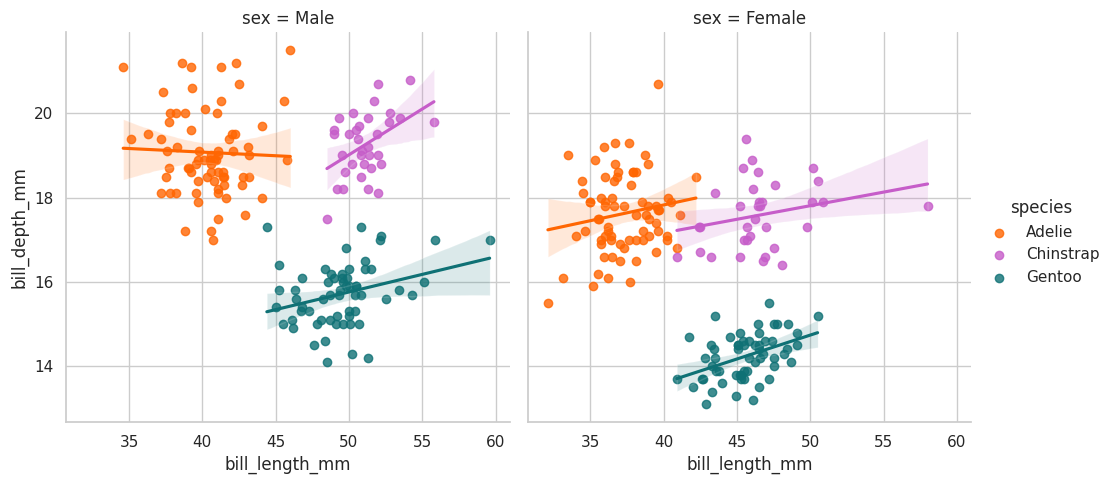

In [179]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y="bill_depth_mm",
    hue='species',
    col='sex',
    palette=penguin_colors,
);

Visualiza siempre los datos para tener una mejor idea de las variables que están relacionadas.

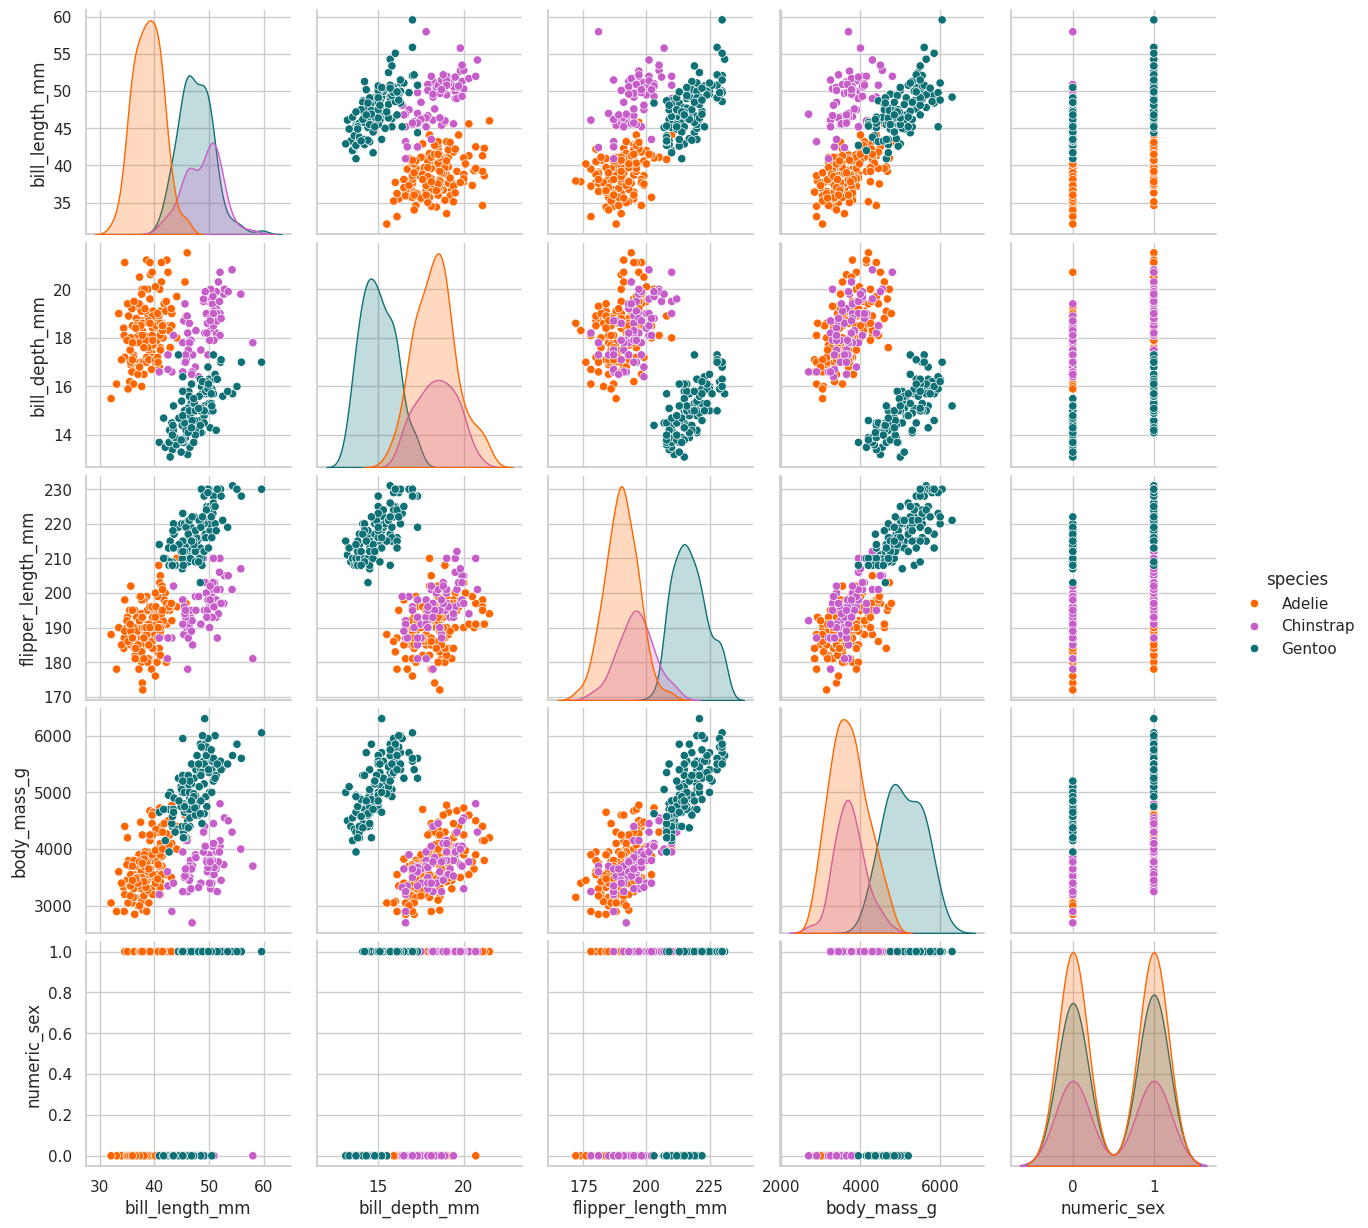

In [188]:
sns.pairplot(
    data=processed_penguins_df,
    hue='species',
    diag_kind='kde',
    palette=penguin_colors
);

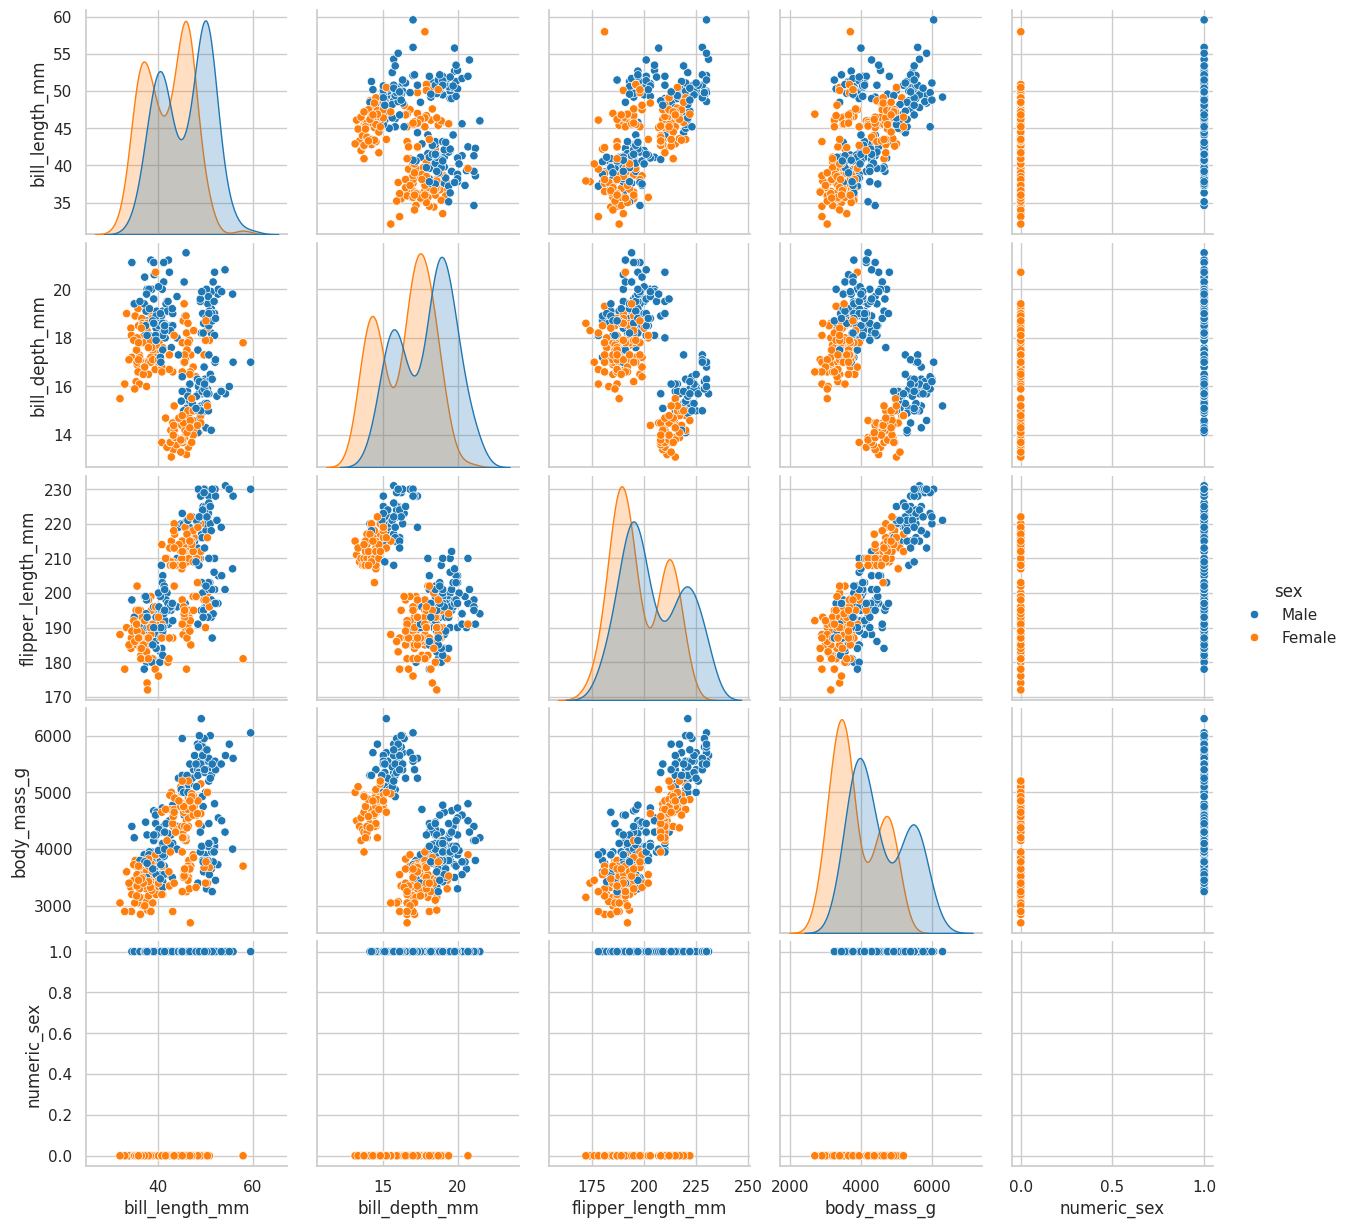

In [190]:
sns.pairplot(
    data=processed_penguins_df,
    hue='sex',
    diag_kind='kde',
    # palette=penguin_colors
);

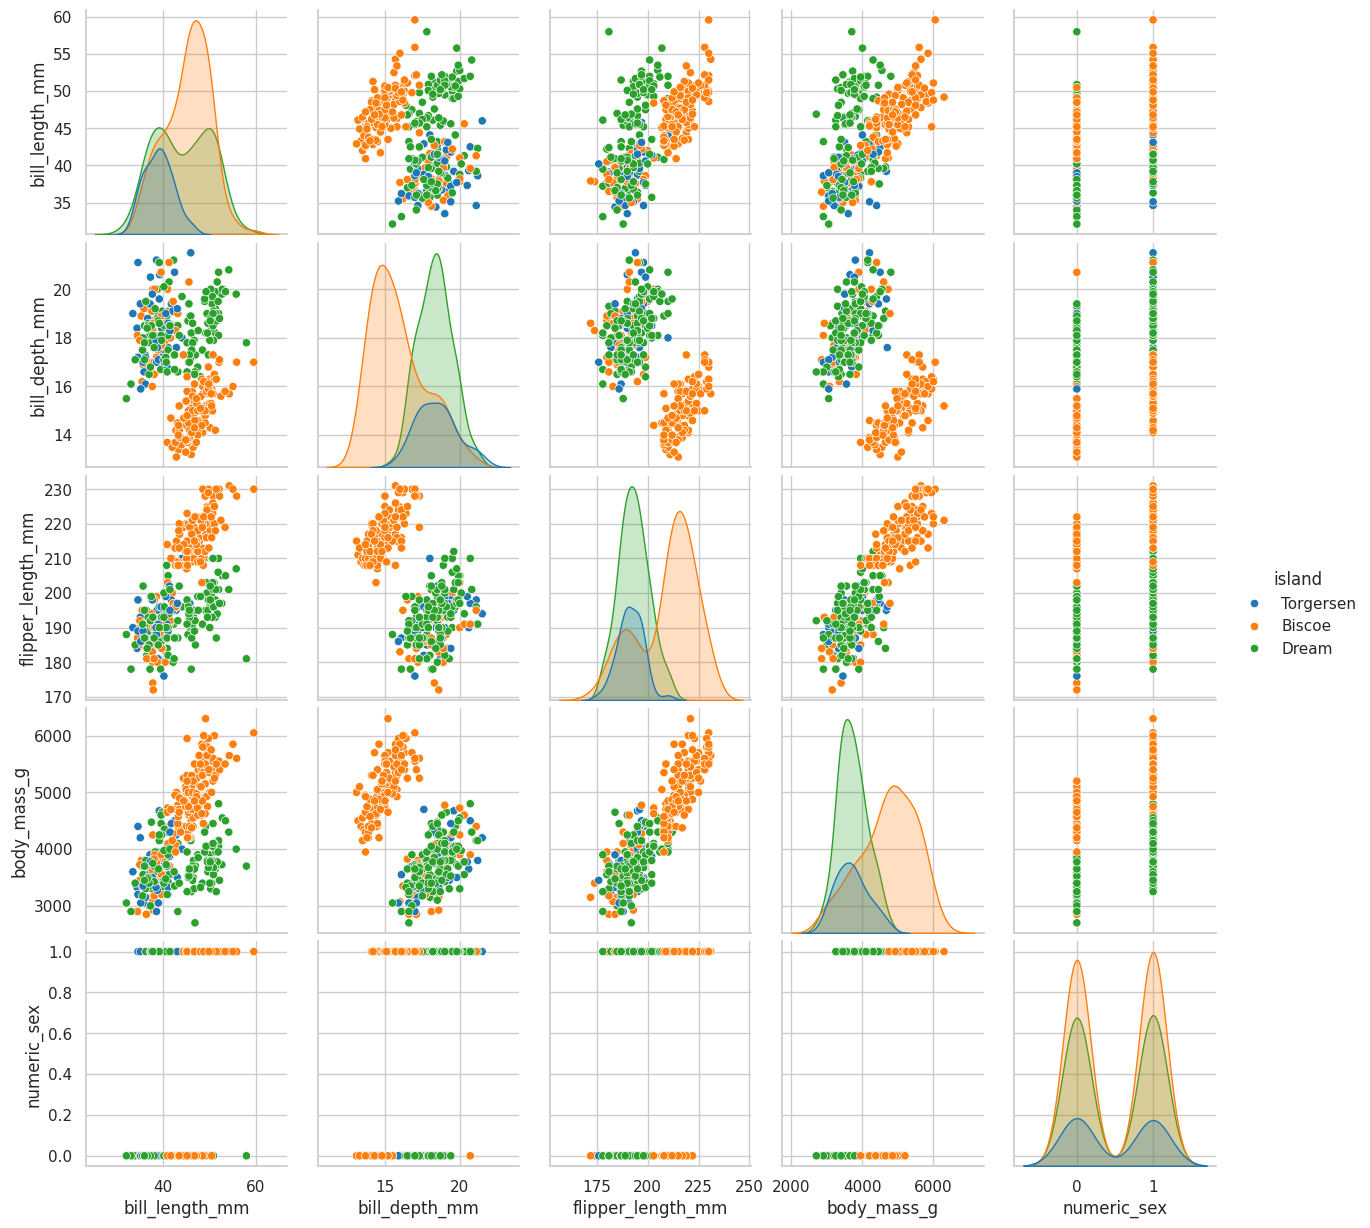

In [191]:
sns.pairplot(
    data=processed_penguins_df,
    hue='island',
    diag_kind='kde',
    # palette=penguin_colors
);

Utiliza pairplot de la librería Seaborn para obtener un resumen visual de las gráficas de par de variables y tener una idea desde el inicio de la EDA sobre la relación de las variables

## ¿Qué hacer cuando tengo muchas variables?

Cuando se tiene muchas variables, un análisis de pares de variables puede ser confuso, por lo que tenemos que recurrir a técnicas que nos ayudan a entender la variación de todos los datos de manera simple:
Reduciendo las dimensiones para obtener un único espacio (Por ejemplo reducir 1000 variables a 10). Algunas de estas técnicas son:

- **PCA** (Principal Component Analysis)

- **TSNE** (T - Distributed Stochastic Neighbor Embedding)

- **UMAP** (Uniform Manifold Approximation and Projection for Dimension Reduction)